In [ ]:
# 그래프에 한국어폰트 나오게
!pip install koreanize-matplotlib

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'


In [2]:
home = os.getenv('HOME') + '/aiffel/datathon_apt/data/' # 로컬에서 사용할 때 사용 하고 각자의 경로에 맞게 설정
# home = '/content/drive/MyDrive/data/'

## EDA

In [ ]:
# 깃에서 클론 했을 시 trian 압축 해제
import zipfile


def unzip_file(zip_file_path, extract_to_path):
    """
    zip_file_path: 압축 파일의 경로
    extract_to_path: 압축을 푸는 경로
    """
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to_path)

# 사용 예시
zip_file_path = home + 'train.csv.zip' # 압축 파일 경로
extract_to_path = home  # 압축을 푸는 경로

unzip_file(zip_file_path, extract_to_path)

In [3]:
park = pd.read_csv(home + 'park.csv')
daycare = pd.read_csv(home + 'day_care_center.csv')
train_df = pd.read_csv(home + 'train.csv')
test_df = pd.read_csv(home +'test.csv')

In [4]:
train_df.shape, test_df.shape, daycare.shape, park.shape

((1216553, 13), (5463, 12), (7551, 11), (1359, 13))

In [5]:
# 각 데이터프레임의 .head()를 순차적으로 표시
dataframe_names = ['train_df', 'test_df', 'park', 'daycare']

# 정의된 데이터프레임 리스트를 순회하며 display 함수로 출력
for name in dataframe_names:
    print(f"{name}.head():")
    display(eval(name).head())
    display(eval(name).info())
    print("\n")  # 데이터프레임 사이에 공백 줄 추가

train_df.head():


,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

None



test_df.head():


,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor
0,1145756,10453,서울특별시,목동,938,청학,목동 938 청학,35.5500,2002,201711,11~20,2
1,1198704,989,부산광역시,초량동,1143-8,고관맨션,초량동 1143-8 고관맨션,68.7200,1977,201708,21~31,2
2,1222384,8597,부산광역시,괴정동,447-13,우림그린,괴정동 447-13 우림그린,72.5400,1989,201710,11~20,2
3,1179897,11086,서울특별시,대치동,1007-2,풍림아이원4차(1007-2),대치동 1007-2 풍림아이원4차(1007-2),111.5400,2004,201707,1~10,10
4,1223091,2121,부산광역시,다대동,1670,다대롯데캐슬블루,다대동 1670 다대롯데캐슬블루,119.6398,2014,201712,11~20,21


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          5463 non-null   int64  
 1   apartment_id            5463 non-null   int64  
 2   city                    5463 non-null   object 
 3   dong                    5463 non-null   object 
 4   jibun                   5463 non-null   object 
 5   apt                     5463 non-null   object 
 6   addr_kr                 5463 non-null   object 
 7   exclusive_use_area      5463 non-null   float64
 8   year_of_completion      5463 non-null   int64  
 9   transaction_year_month  5463 non-null   int64  
 10  transaction_date        5463 non-null   object 
 11  floor                   5463 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 512.3+ KB


None



park.head():


,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,NaN,NaN,NaN,NaN,NaN,1965.0,2018-08-14
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,NaN,NaN,NaN,NaN,NaN,1968.0,2018-08-14
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,NaN,NaN,NaN,NaN,NaN,1970.0,2018-08-14


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         1359 non-null   object 
 1   gu                           1356 non-null   object 
 2   dong                         1359 non-null   object 
 3   park_name                    1359 non-null   object 
 4   park_type                    1359 non-null   object 
 5   park_area                    1359 non-null   float64
 6   park_exercise_facility       277 non-null    object 
 7   park_entertainment_facility  435 non-null    object 
 8   park_benefit_facility        266 non-null    object 
 9   park_cultural_facitiy        72 non-null     object 
 10  park_facility_other          175 non-null    object 
 11  park_open_year               937 non-null    float64
 12  reference_date               1359 non-null   object 
dtypes: float64(2), obj

None



daycare.head():


,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31
3,서울특별시,서대문구,고운햇살어린이집,가정,18,5.0,3.0,0.0,4.0,N,2018-07-31
4,서울특별시,서대문구,고은어린이집,국공립,93,20.0,7.0,2.0,10.0,N,2018-07-31


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7551 entries, 0 to 7550
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   city                  7551 non-null   object 
 1   gu                    7551 non-null   object 
 2   day_care_name         7551 non-null   object 
 3   day_care_type         7551 non-null   object 
 4   day_care_baby_num     7551 non-null   int64  
 5   teacher_num           7326 non-null   float64
 6   nursing_room_num      4352 non-null   float64
 7   playground_num        3626 non-null   float64
 8   CCTV_num              5280 non-null   float64
 9   is_commuting_vehicle  7055 non-null   object 
 10  reference_date        7551 non-null   object 
dtypes: float64(4), int64(1), object(6)
memory usage: 649.0+ KB


None

### 아파트 데이터

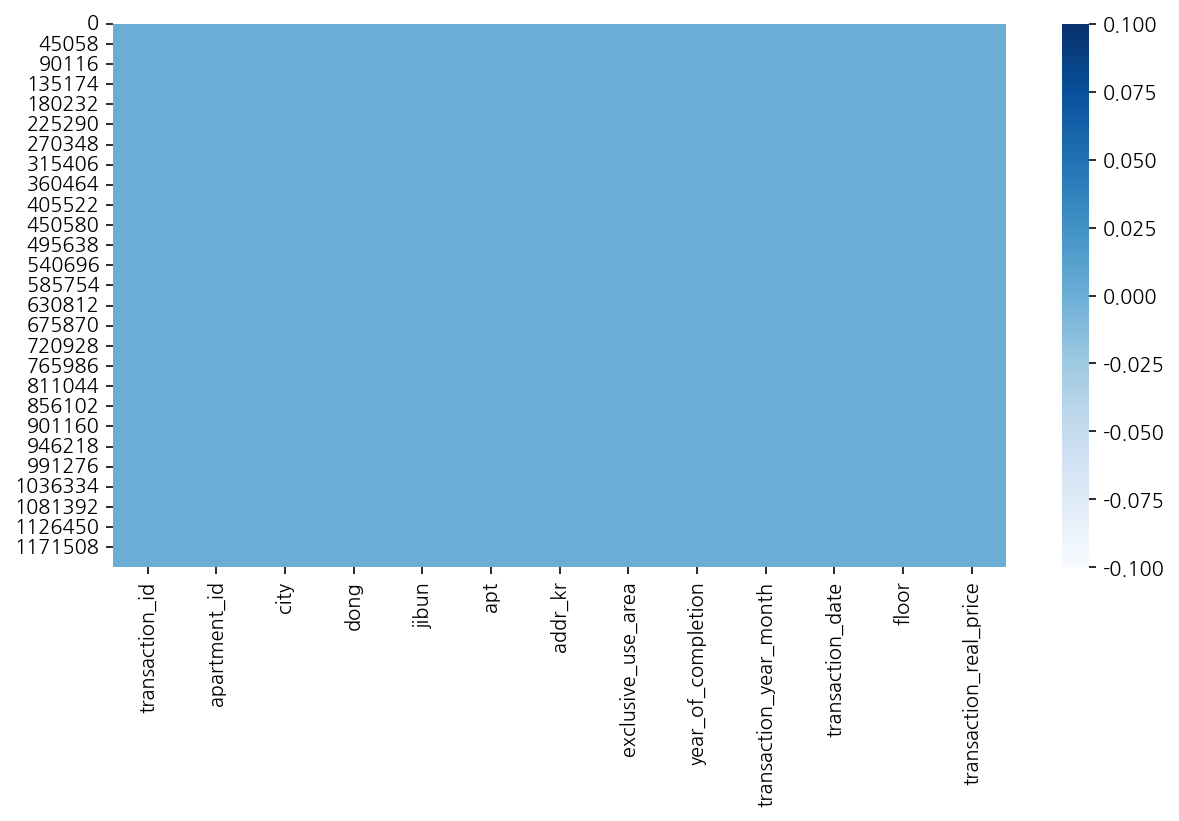

In [6]:
# 결측치 시각화
fig = plt.figure(figsize=(10, 5))
sns.heatmap(train_df.isnull(), cmap='Blues');

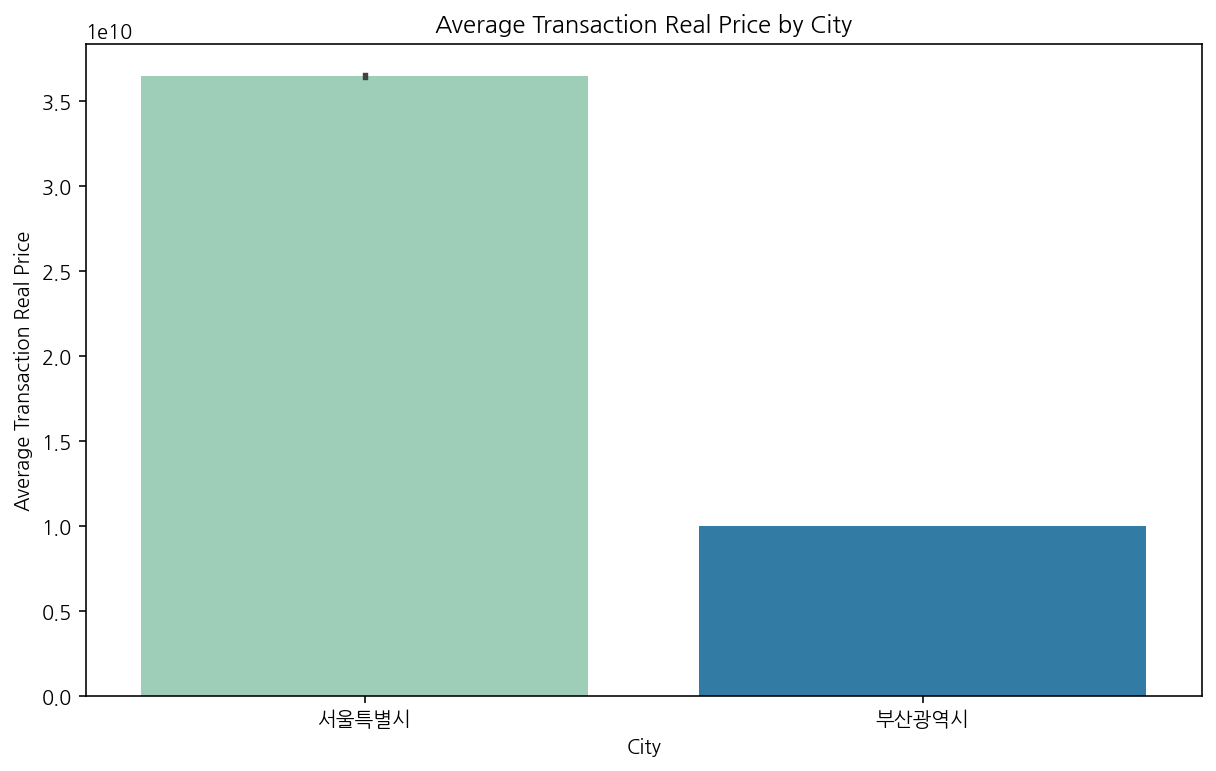

In [7]:
# 각 도시별 아파트 거래 가격의 평균 시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='city', y='transaction_real_price', data=train_df, estimator=sum, palette='YlGnBu')
plt.title('Average Transaction Real Price by City')
plt.xlabel('City')
plt.ylabel('Average Transaction Real Price')
plt.show()



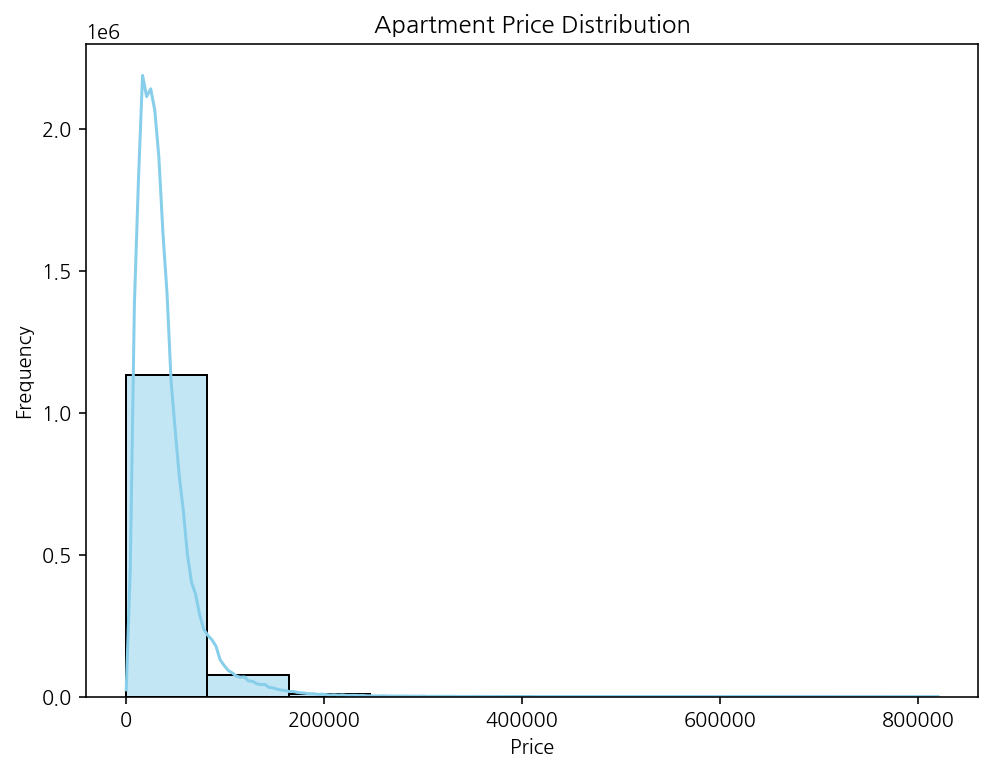

In [8]:
# 아파트 가격 분포 시각화
plt.figure(figsize=(8, 6))
sns.histplot(train_df['transaction_real_price'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Apartment Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


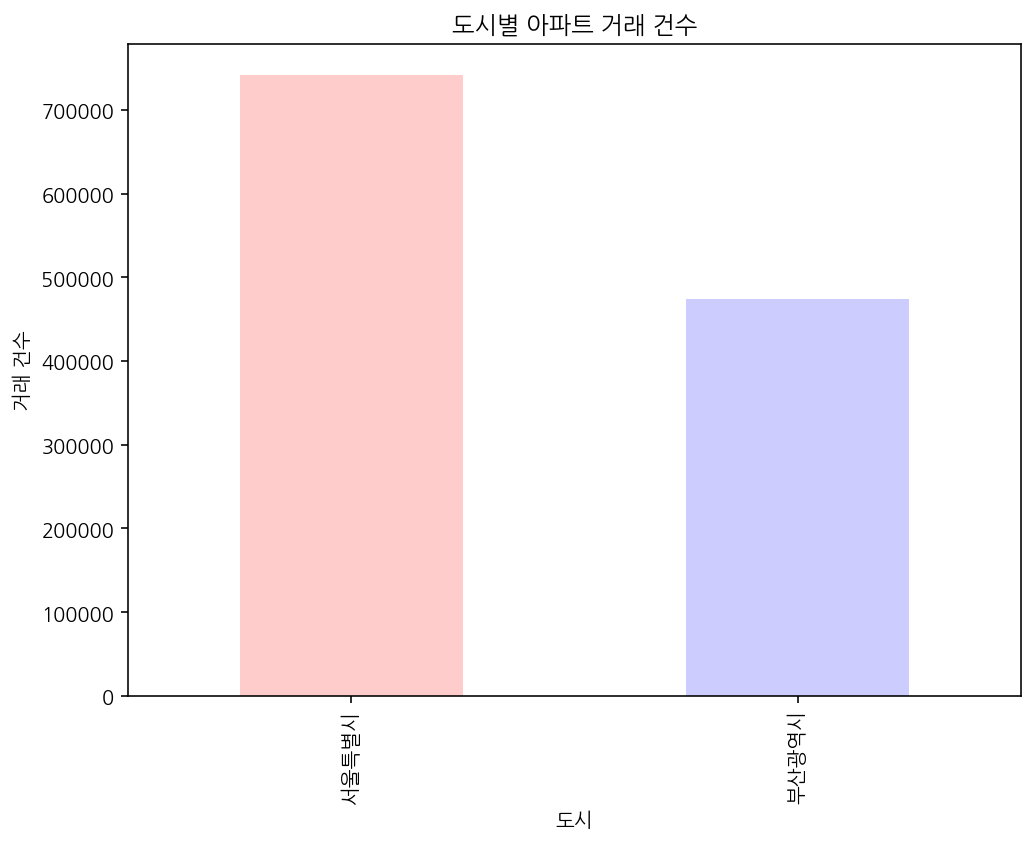

In [9]:
# 지역별 아파트 거래량
plt.figure(figsize=(8, 6))
train_df['city'].value_counts().plot(kind='bar', color=['red', 'blue'], alpha=0.2)
plt.title('도시별 아파트 거래 건수')
plt.xlabel('도시')
plt.ylabel('거래 건수')
plt.show()


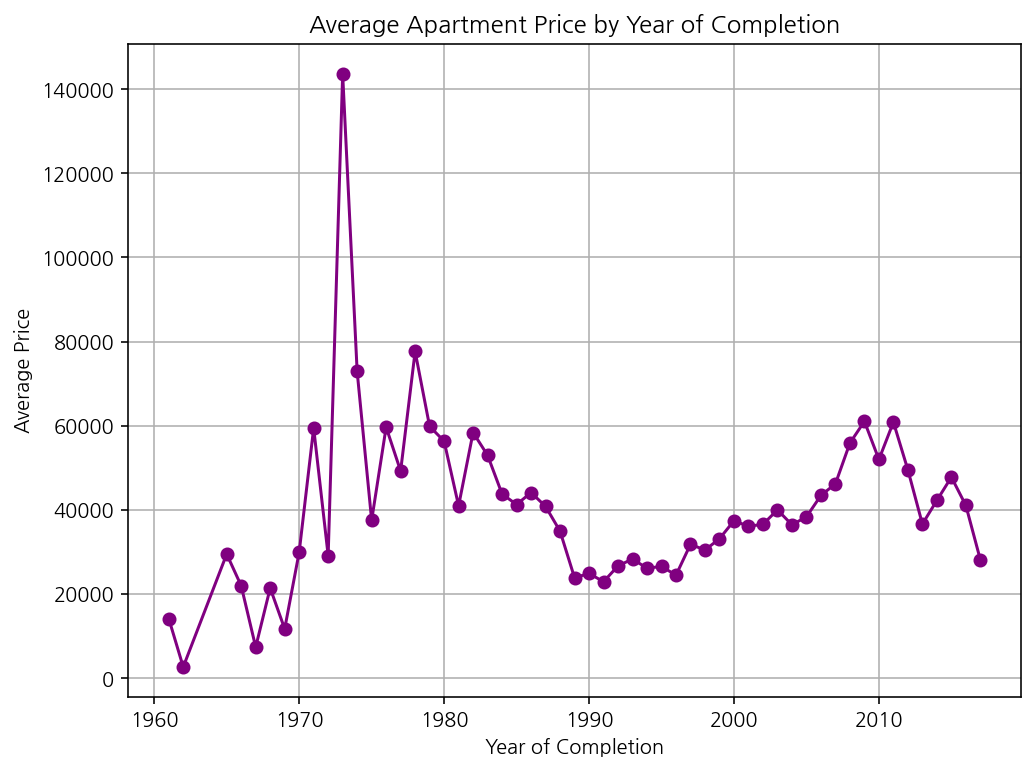

In [10]:
# 아파트 건축 연도별 변화 시각화
plt.figure(figsize=(8, 6))
train_df.groupby('year_of_completion')['transaction_real_price'].mean().plot(marker='o', color='purple')
plt.title('Average Apartment Price by Year of Completion')
plt.xlabel('Year of Completion')
plt.ylabel('Average Price')
plt.grid(True)
plt.show()


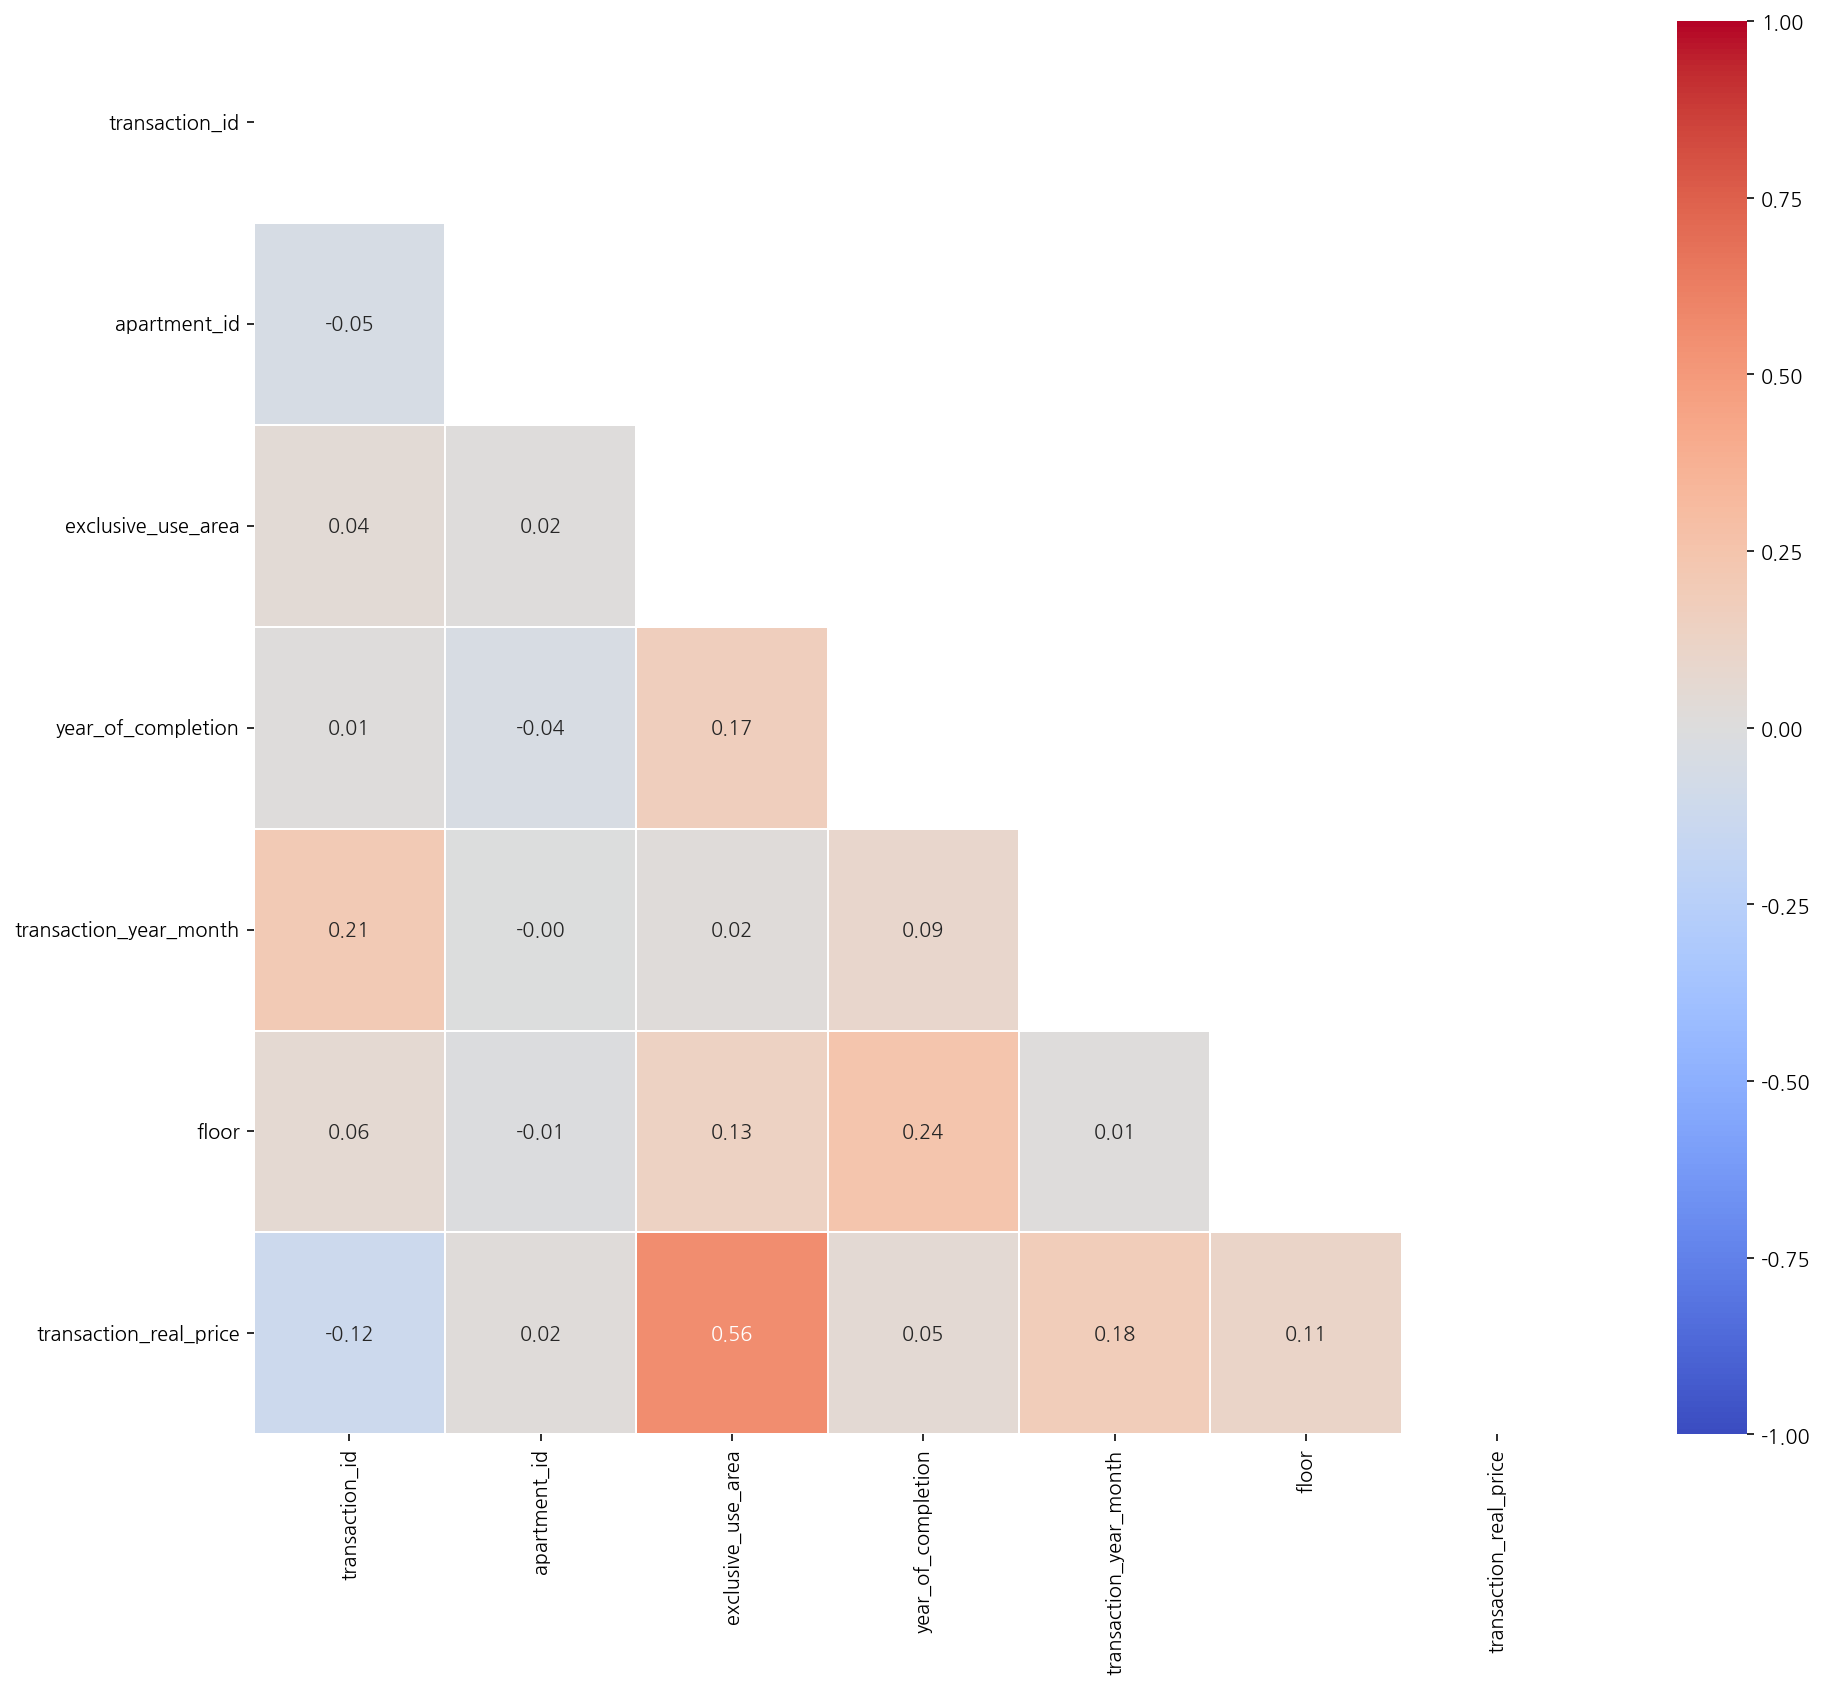

In [11]:
# 아파트 피쳐 상관관계 확인
# corr = train_df.corr(numeric_only=True)
# mask = np.triu(np.ones_like(corr, dtype=bool))
# fig = plt.figure(figsize=(15, 13))
# sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2, vmin = -1, vmax = 1, mask = mask)

# 파이썬 버전차이로 조금 LMS에서는 이 코드를 사용
numeric_columns = train_df.select_dtypes(include=np.number)
corr = numeric_columns.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
fig = plt.figure(figsize=(15, 13))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2, vmin=-1, vmax=1, mask=mask)
plt.show()


사용 구역과 가격의 상관관계가 높다는 것을 알 수 있었다.<br>
그 다음으로 완공연도 와 층의 상관관계가 높았다.

In [12]:
# Drop non-numeric columns
numeric_train_df = train_df.select_dtypes(include=[np.number])

# Calculate correlation
corr = numeric_train_df.corr()['transaction_real_price'].sort_values(ascending=False)

print(corr)

transaction_real_price    1.000000
exclusive_use_area        0.561563
transaction_year_month    0.183910
floor                     0.112278
year_of_completion        0.052656
apartment_id              0.017576
transaction_id           -0.120734
Name: transaction_real_price, dtype: float64


<AxesSubplot:>

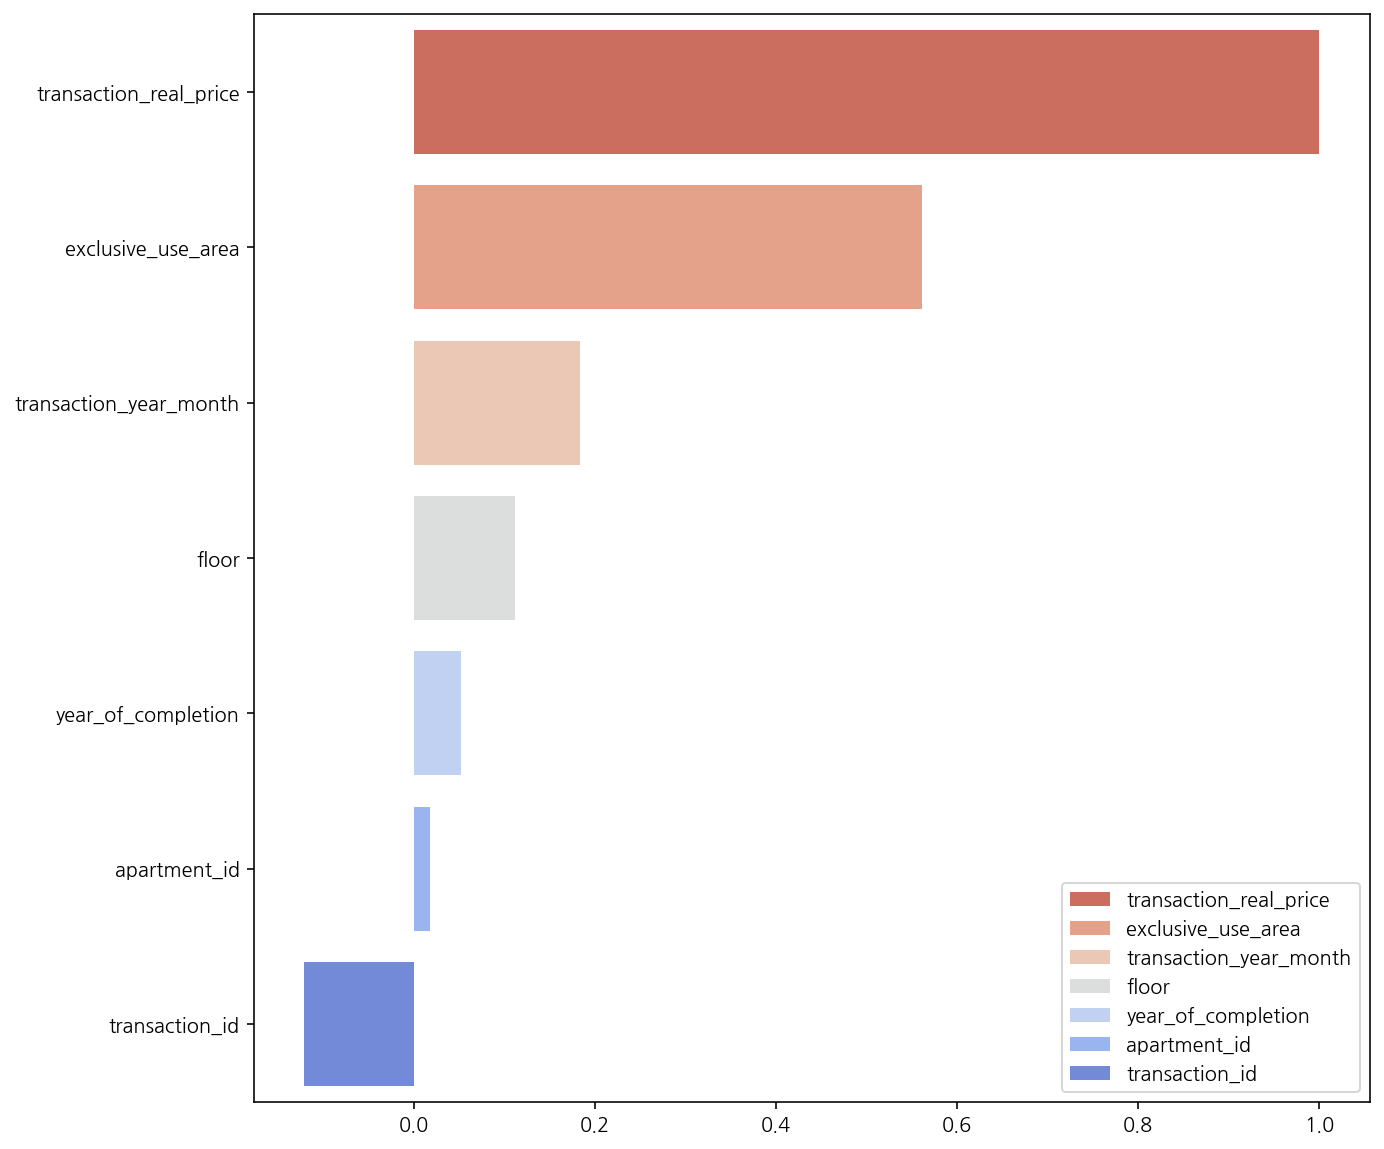

In [13]:
fig = plt.figure(figsize=(10, 10))
sns.barplot(x=corr.values, y=corr.index, hue=corr.index, dodge=False, palette='coolwarm_r')

<AxesSubplot:xlabel='transaction_real_price'>

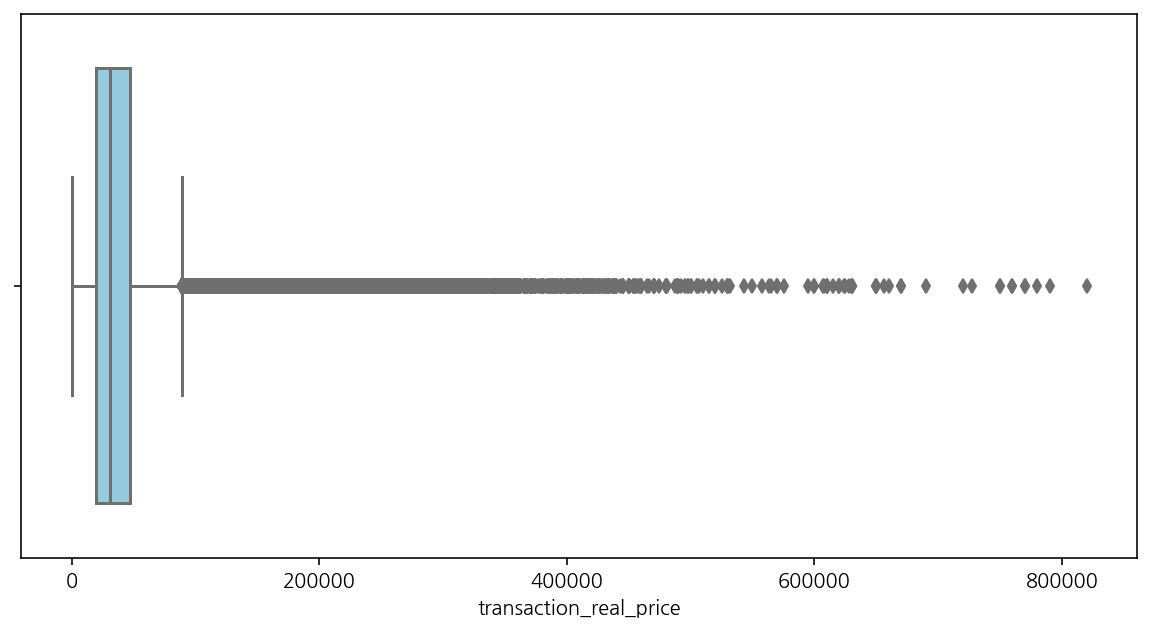

In [14]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(data = train_df, x='transaction_real_price', color='skyblue')

비싸게 팔린 몇몇 부동산 거래수가 많이 있는것으로 추정됌

In [15]:

# sns.pairplot(train_df, kind="kde")


### 어린이집 데이터

<AxesSubplot:>

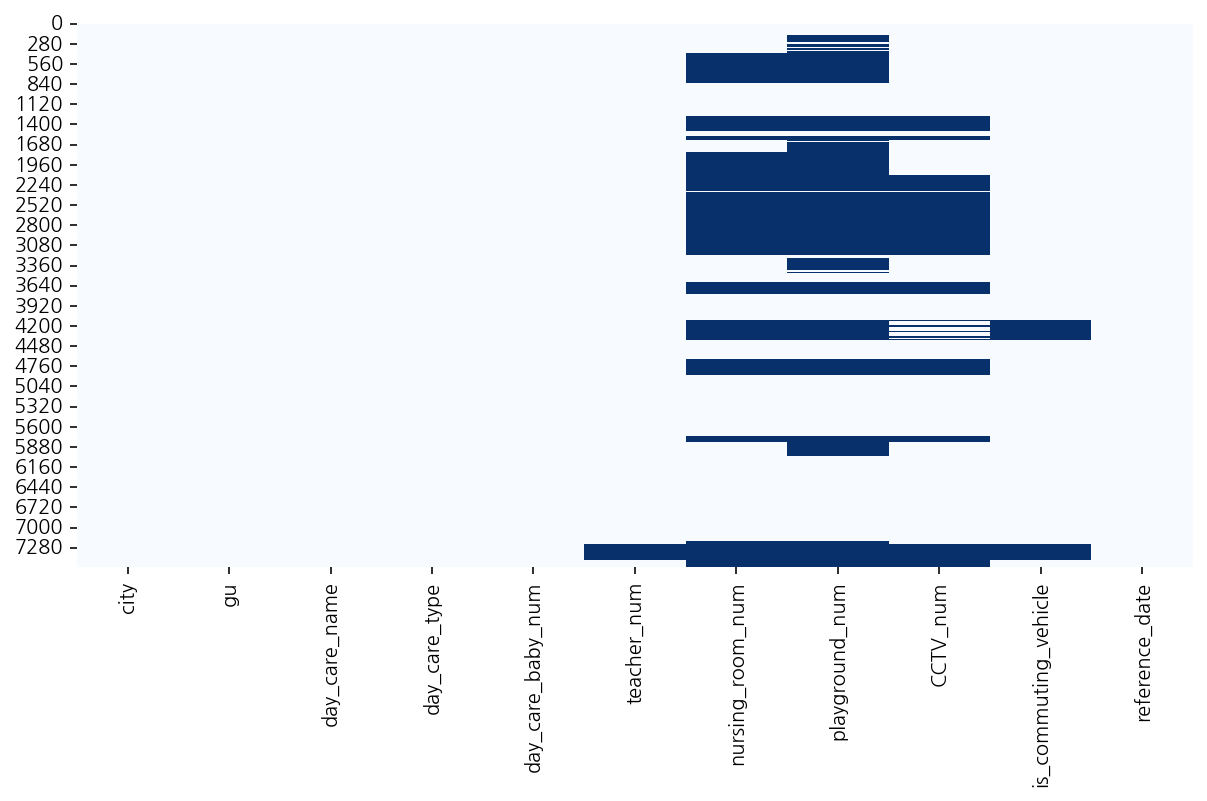

In [16]:
# 결측치 시각화     
fig = plt.figure(figsize=(10, 5))
sns.heatmap(daycare.isnull(), cbar=False, cmap='Blues')  

아파트 데이터에 비해서 결측치가 상당히 많은걸 확인

In [17]:
daycare.groupby('day_care_type').size()

day_care_type
가정        3120
국공립       1408
민간        2492
법인·단체      113
사회복지법인     107
직장         272
협동          39
dtype: int64

In [18]:
daycare.groupby('day_care_type').agg(['mean'])[['day_care_baby_num', 'teacher_num', 'nursing_room_num', 'playground_num', 'CCTV_num']]


,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num
,mean,mean,mean,mean,mean
day_care_type,,,,,
가정,18.394551,5.467890,3.310231,0.097790,4.054497
국공립,64.024858,11.867953,5.040201,0.665710,8.883065
민간,60.483949,11.007838,5.652452,0.528854,8.105740
법인·단체,64.575221,10.451327,4.658228,0.952381,7.352273
사회복지법인,85.392523,14.420561,6.132353,0.758621,9.746479
직장,71.334559,15.122951,5.299363,0.859259,13.171123
협동,29.179487,6.578947,3.925926,0.000000,2.333333


<AxesSubplot:xlabel='city', ylabel='count'>

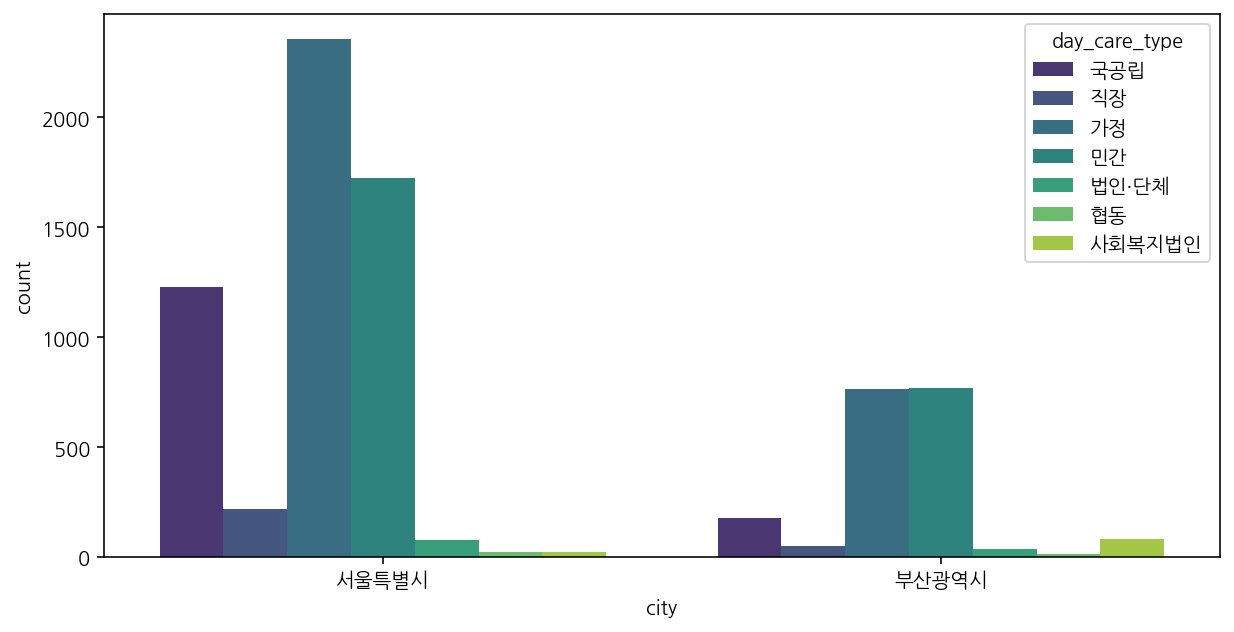

In [19]:
fig = plt.figure(figsize=(10, 5))
sns.countplot(data=daycare, x='city', hue='day_care_type', palette='viridis')

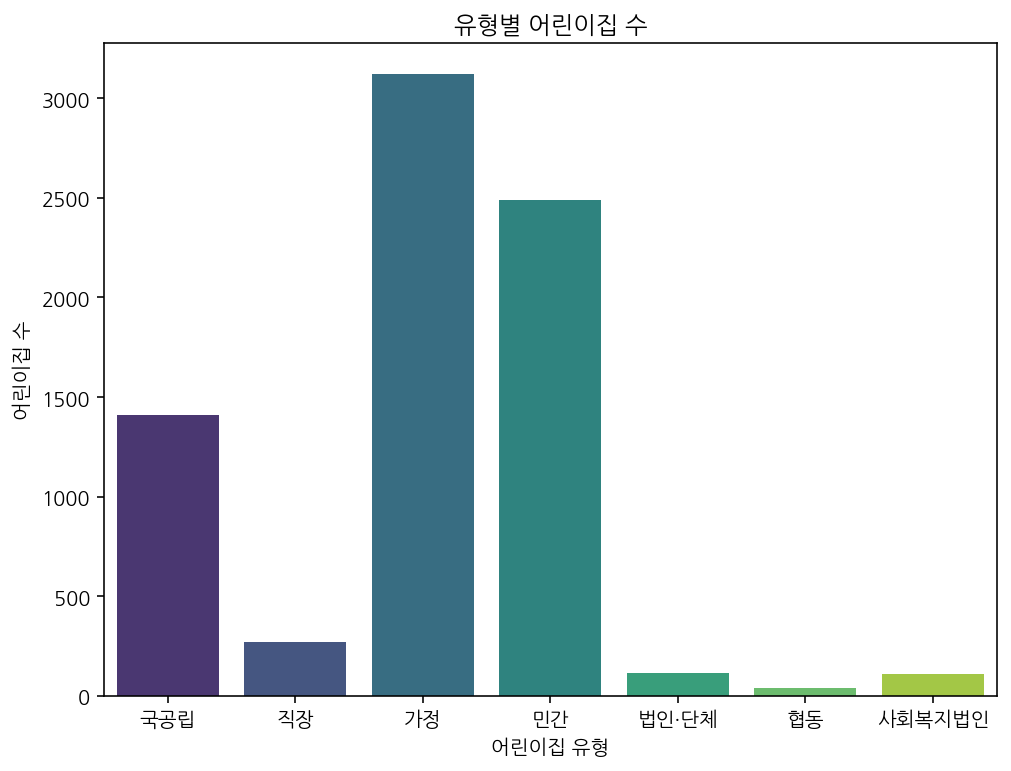

In [20]:
# 어린이집 유형별로 개수를 카운트하여 시각화
plt.figure(figsize=(8, 6))
sns.countplot(data=daycare, x='day_care_type',palette='viridis')
plt.title('유형별 어린이집 수')
plt.xlabel('어린이집 유형')
plt.ylabel('어린이집 수')
plt.show()


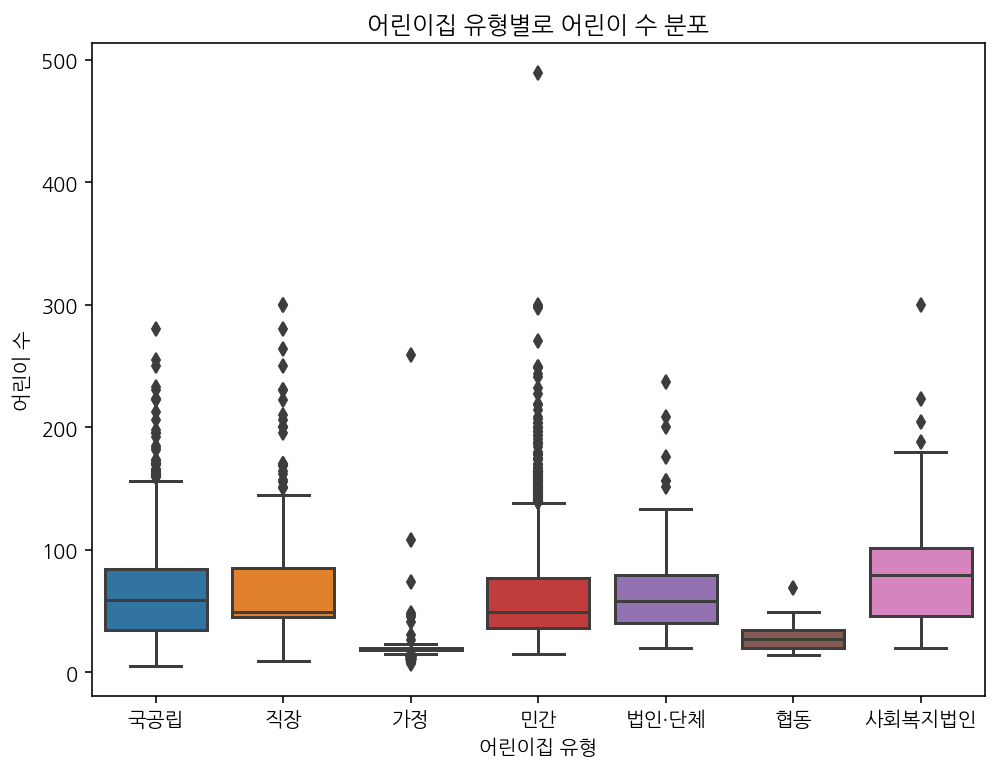

In [21]:
# 어린이집 유형별로 어린이 수 
plt.figure(figsize=(8, 6))
sns.boxplot(data=daycare, x='day_care_type', y='day_care_baby_num')
plt.title('어린이집 유형별로 어린이 수 분포')
plt.xlabel('어린이집 유형')
plt.ylabel('어린이 수')
plt.show()


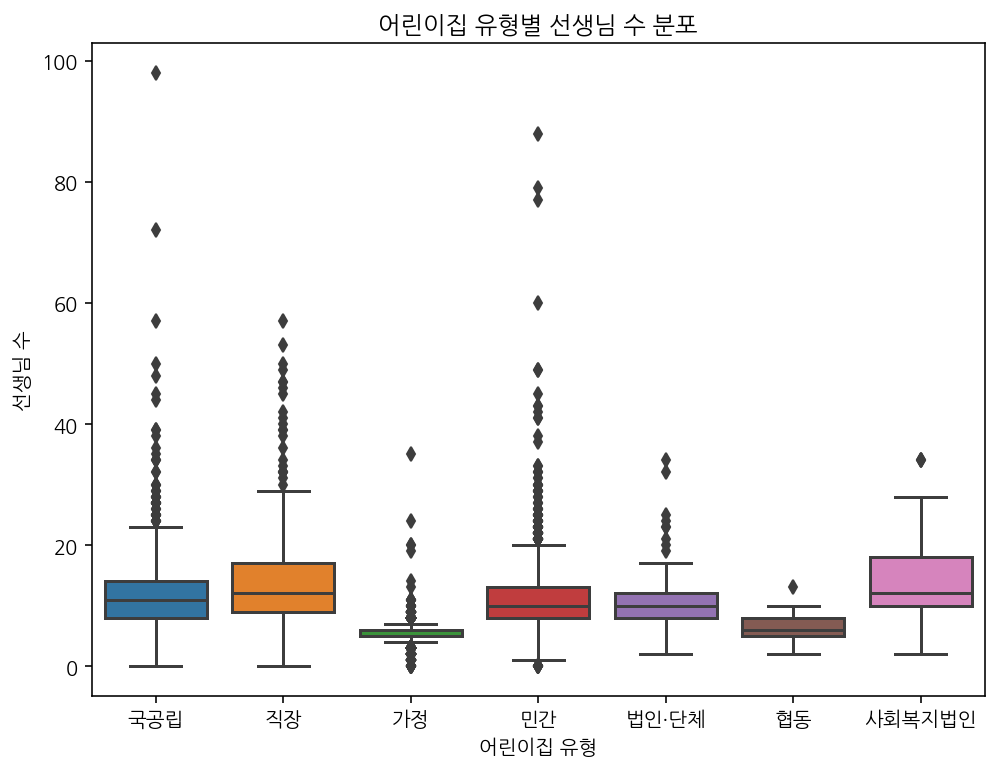

In [22]:
# 어린이집 유형별로 선생님 수 
plt.figure(figsize=(8, 6))
sns.boxplot(data=daycare, x='day_care_type', y='teacher_num')
plt.title('어린이집 유형별 선생님 수 분포')
plt.xlabel('어린이집 유형')
plt.ylabel('선생님 수')
plt.show()


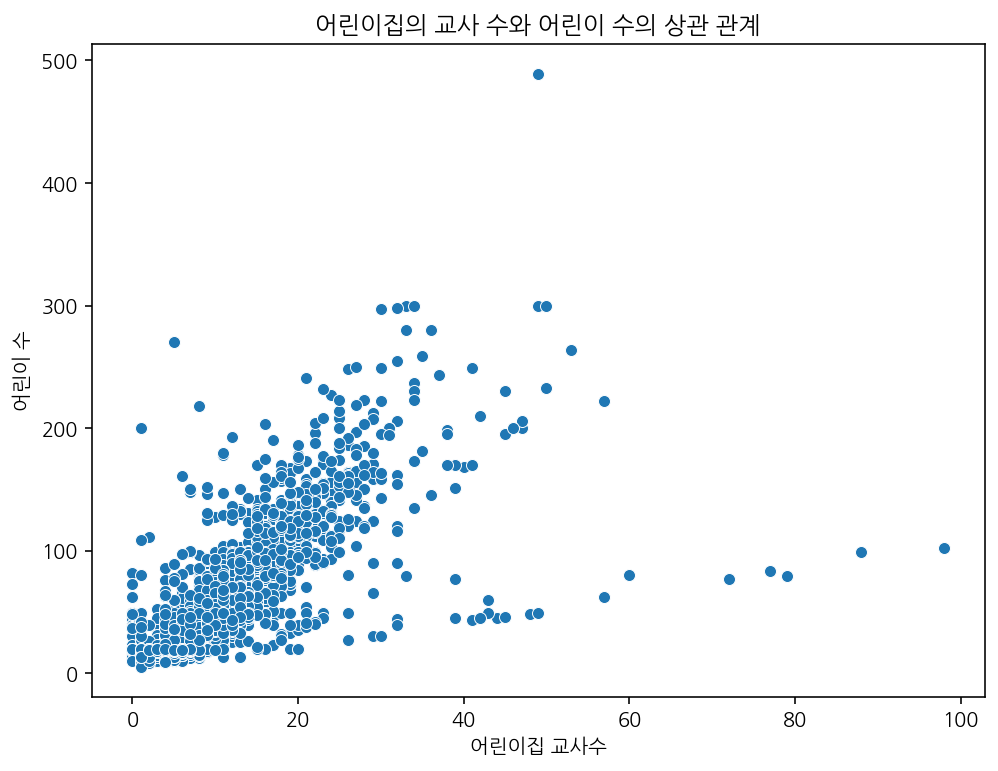

In [23]:
# 어린이집의 교사 수 와 어린이 수의 상관 관계
plt.figure(figsize=(8, 6))
sns.scatterplot(data=daycare, x='teacher_num', y='day_care_baby_num')
plt.title('어린이집의 교사 수와 어린이 수의 상관 관계')
plt.xlabel('어린이집 교사수')
plt.ylabel('어린이 수')
plt.show()


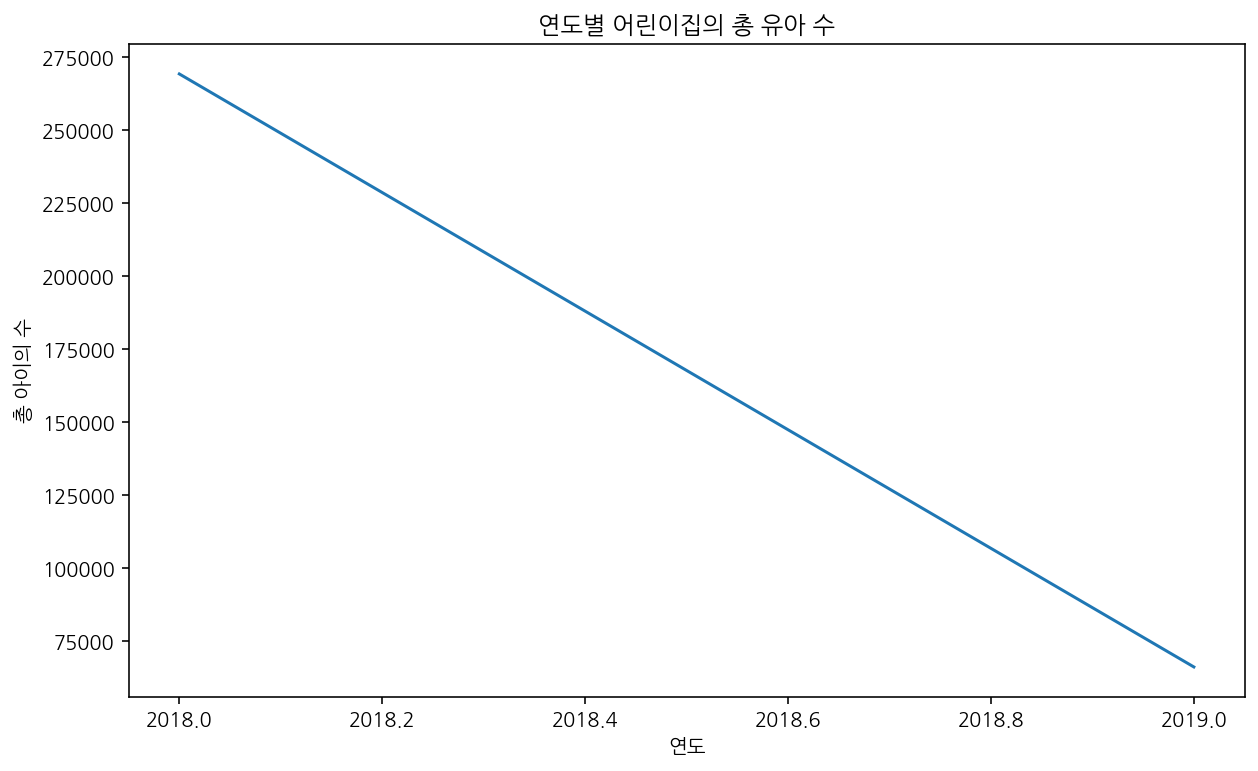

In [24]:
# 'reference_date' 열을 연도 정보로 변환
daycare['reference_date'] = pd.to_datetime(daycare['reference_date'])
daycare['year'] = daycare['reference_date'].dt.year

plt.figure(figsize=(10, 6))
sns.lineplot(data=daycare, x='year', y='day_care_baby_num', estimator='sum', ci=None)
plt.title('연도별 어린이집의 총 유아 수')
plt.xlabel('연도')
plt.ylabel('총 아이의 수')
plt.show()


저출산 시대에 살고 있는게 맞는거 같다

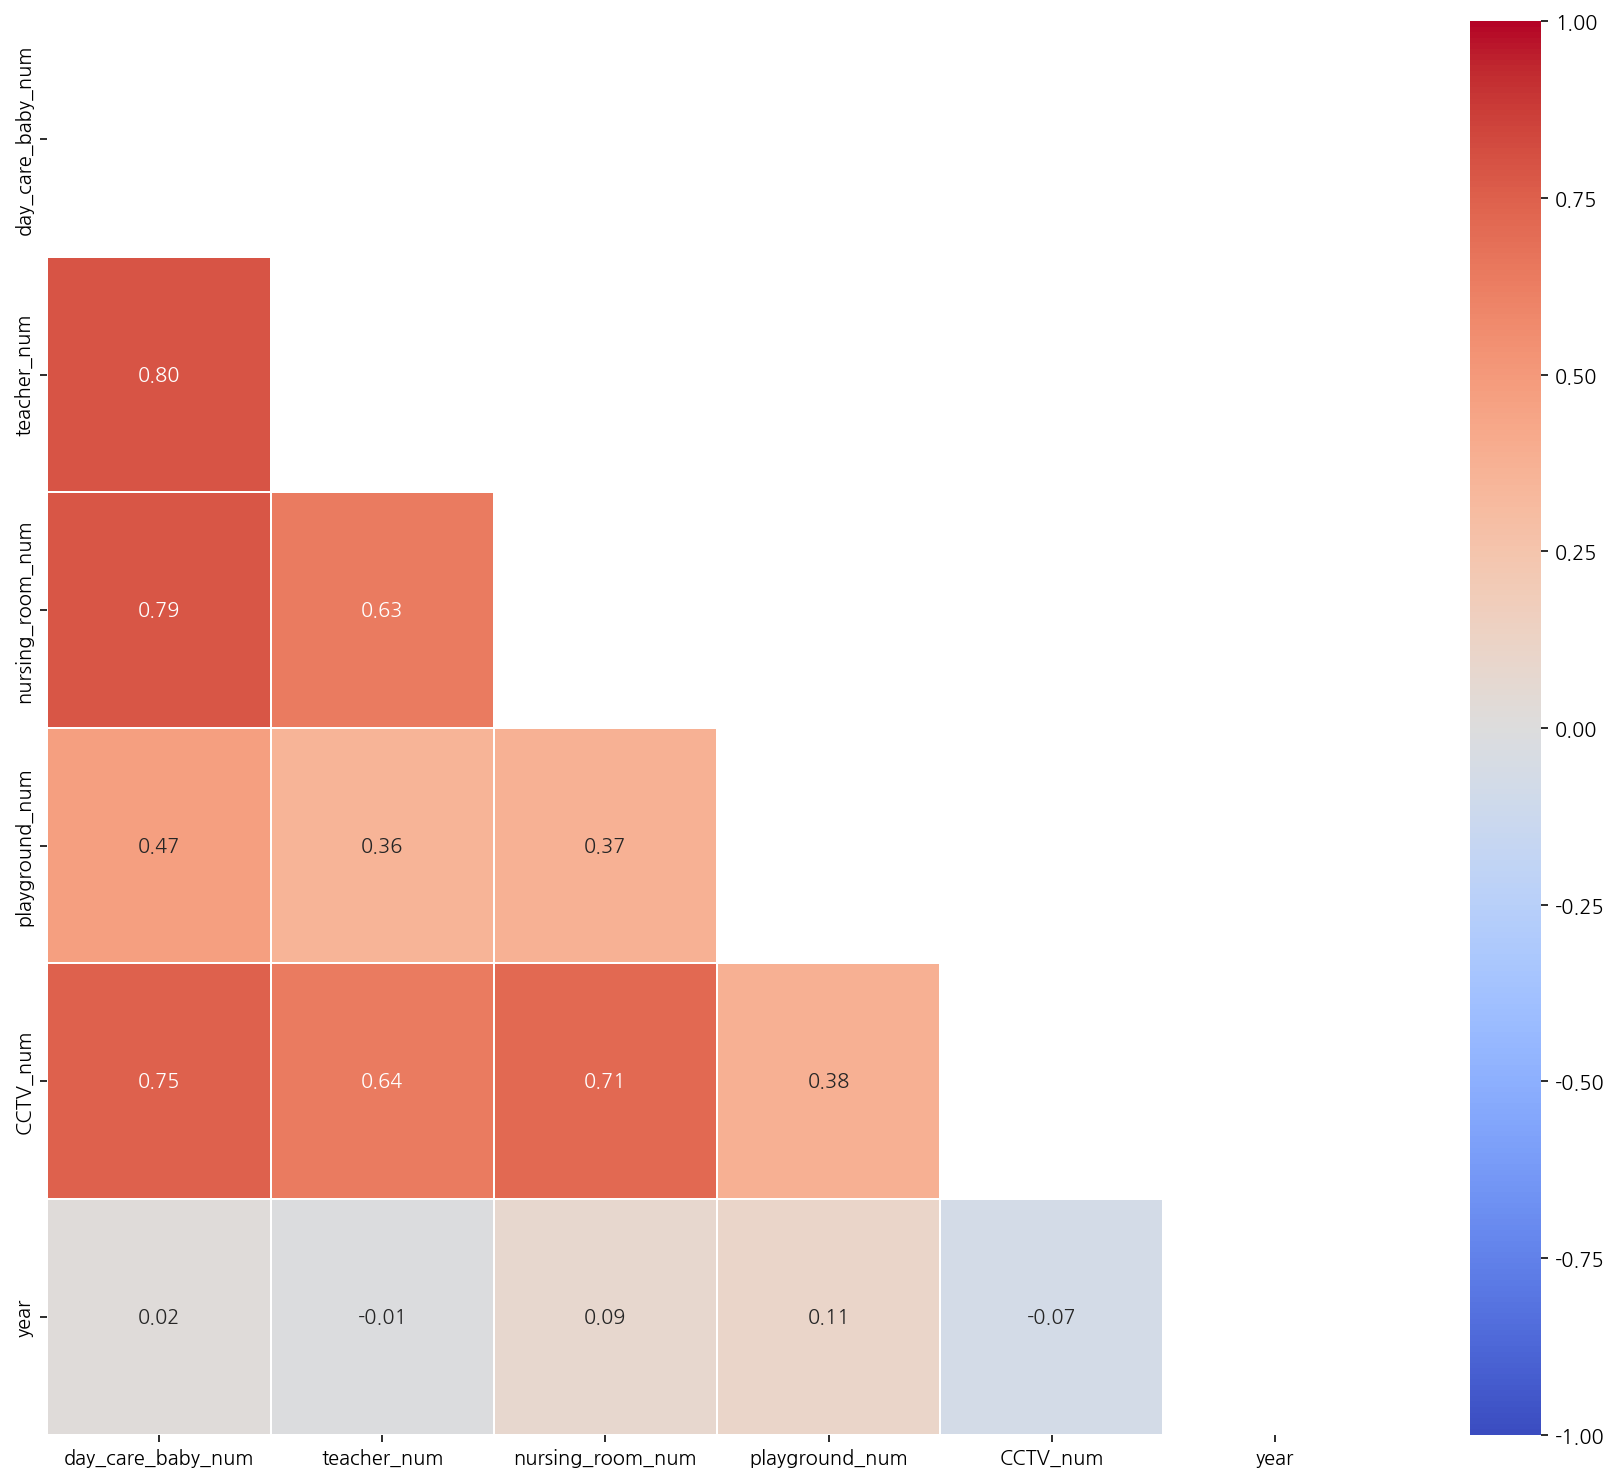

In [25]:
# 유치원 피쳐 상관관계 확인
# corr = daycare.corr(numeric_only=True)
# mask = np.triu(np.ones_like(corr, dtype=bool))
# fig = plt.figure(figsize=(15, 13))
# sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2, vmin = -1, vmax = 1, mask = mask)

# 파이썬 버전차이로 조금 LMS에서는 이 코드를 사용
numeric_columns = daycare.select_dtypes(include=np.number)
corr = numeric_columns.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))
fig = plt.figure(figsize=(15, 13))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2, vmin=-1, vmax=1, mask=mask)
plt.show()


In [26]:
# Drop non-numeric columns
numeric_train_df = daycare.select_dtypes(include=[np.number])

# Calculate correlation
corr = numeric_train_df.corr()['day_care_baby_num'].sort_values(ascending=False)

print(corr)

day_care_baby_num    1.000000
teacher_num          0.796199
nursing_room_num     0.788166
CCTV_num             0.746723
playground_num       0.472172
year                 0.017496
Name: day_care_baby_num, dtype: float64


<AxesSubplot:>

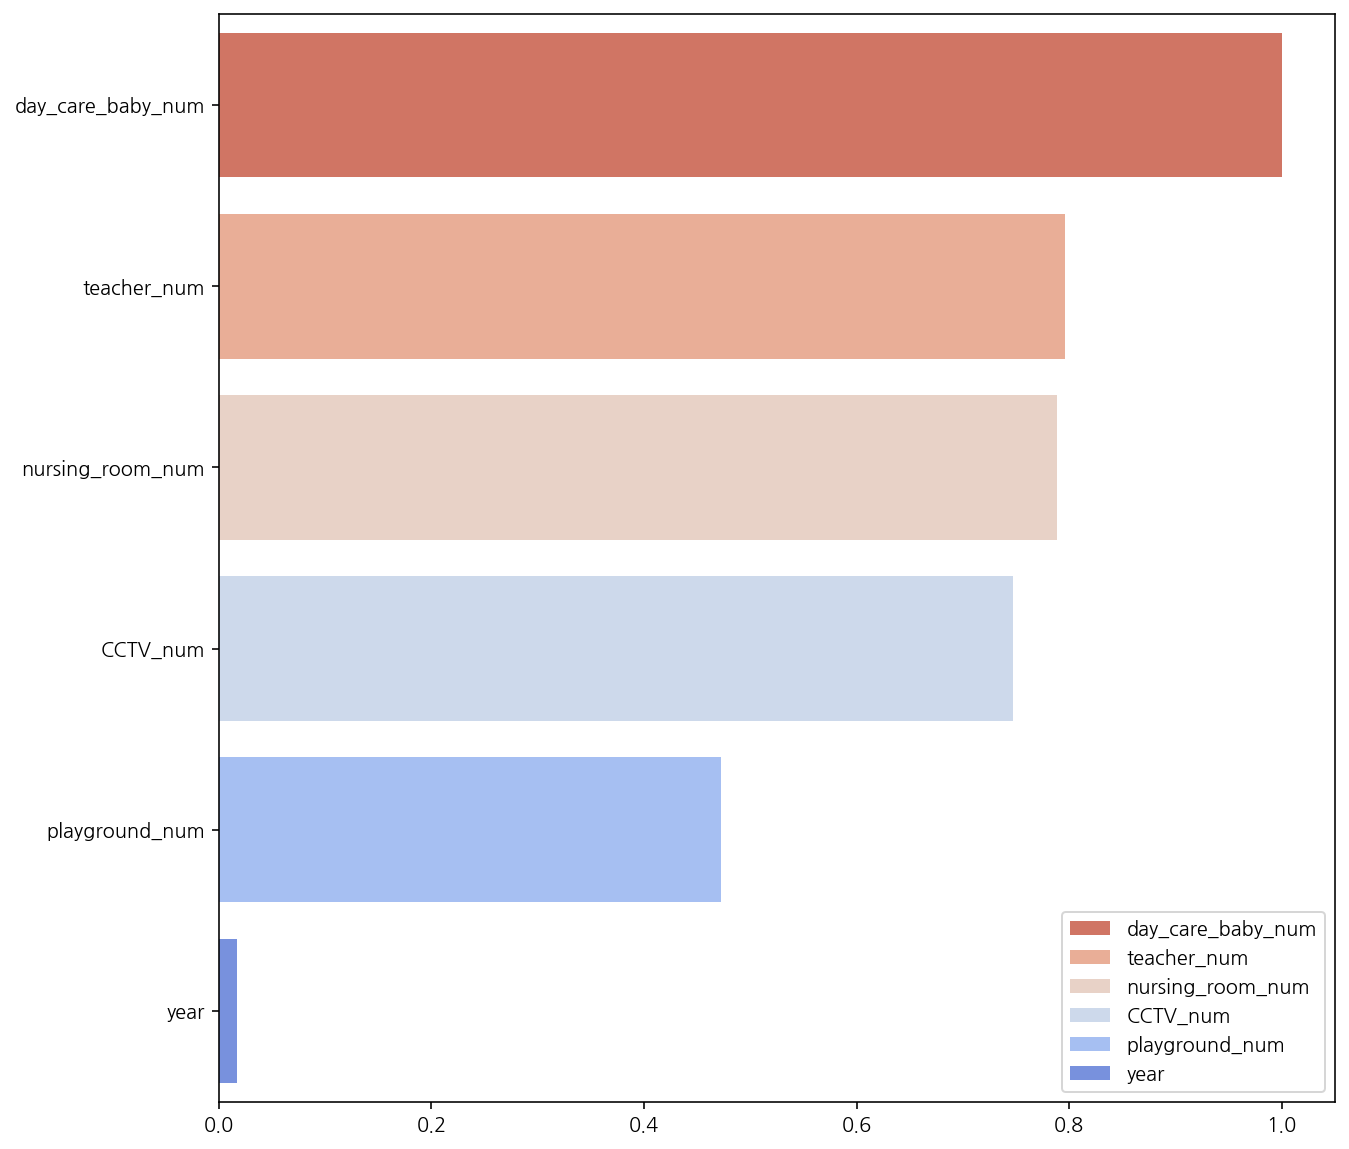

In [27]:
fig = plt.figure(figsize=(10, 10))
sns.barplot(x=corr.values, y=corr.index, hue=corr.index, dodge=False, palette='coolwarm_r')

### 공원 데이터

<AxesSubplot:>

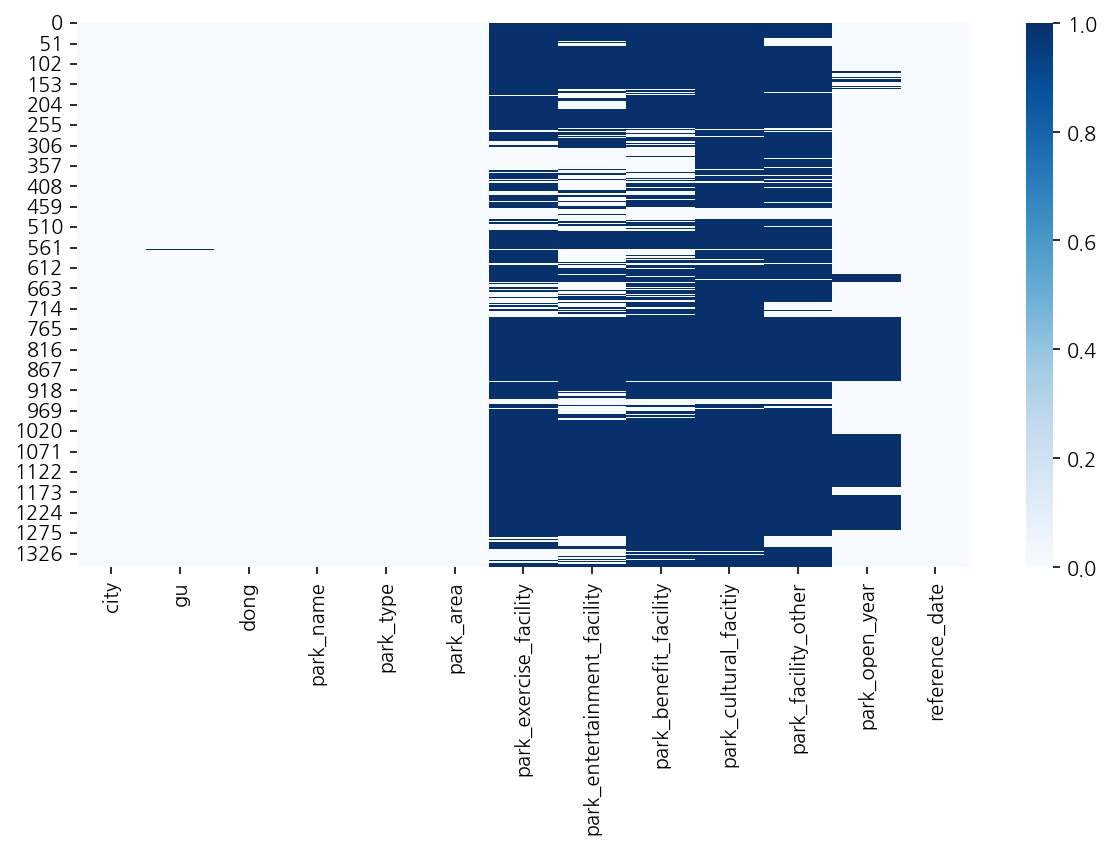

In [28]:
# 결측치 시각화
fig = plt.figure(figsize=(10, 5))
sns.heatmap(park.isnull(), cmap='Blues')  

결측치가 많다는 것을 알 수 있었다.

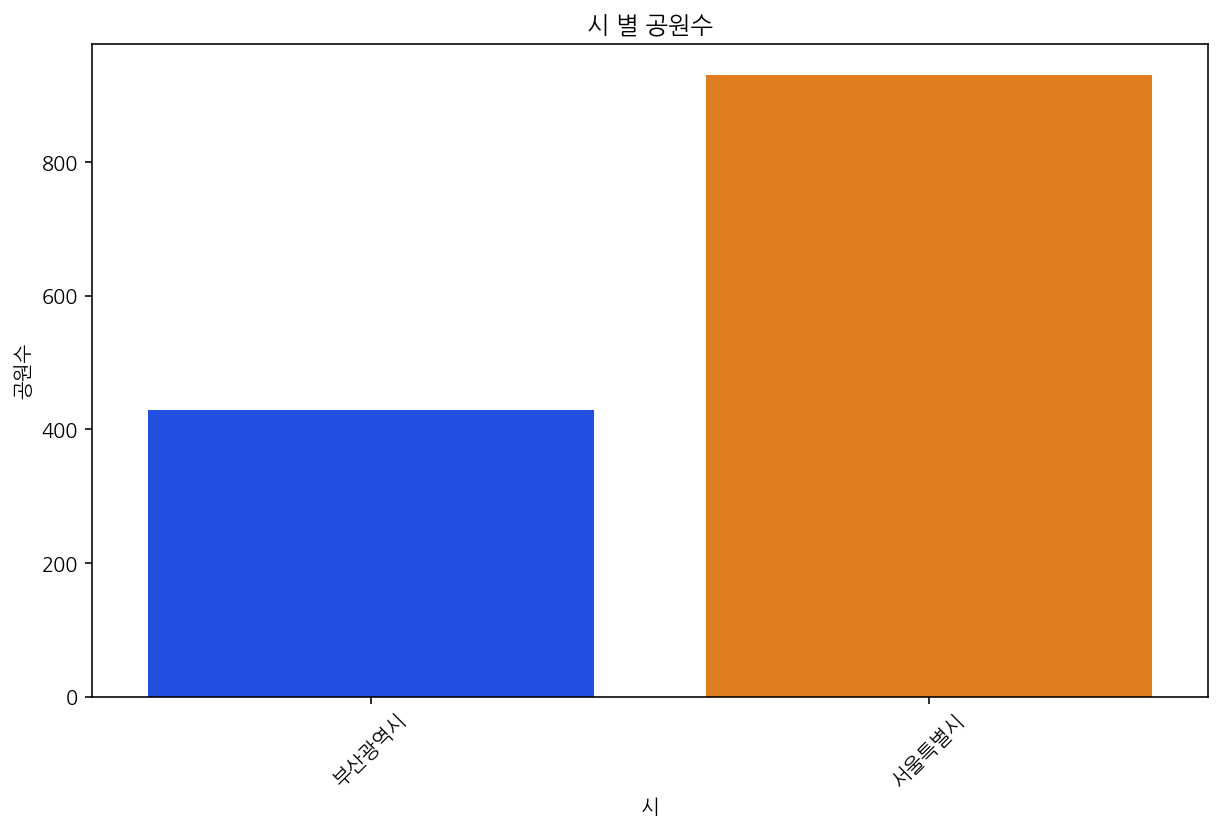

In [29]:
# 도시별 공원 개수
plt.figure(figsize=(10, 6))
sns.countplot(data=park, x='city', palette='bright')
plt.title('시 별 공원수')
plt.xlabel('시')
plt.ylabel('공원수')
plt.xticks(rotation=45)
plt.show()


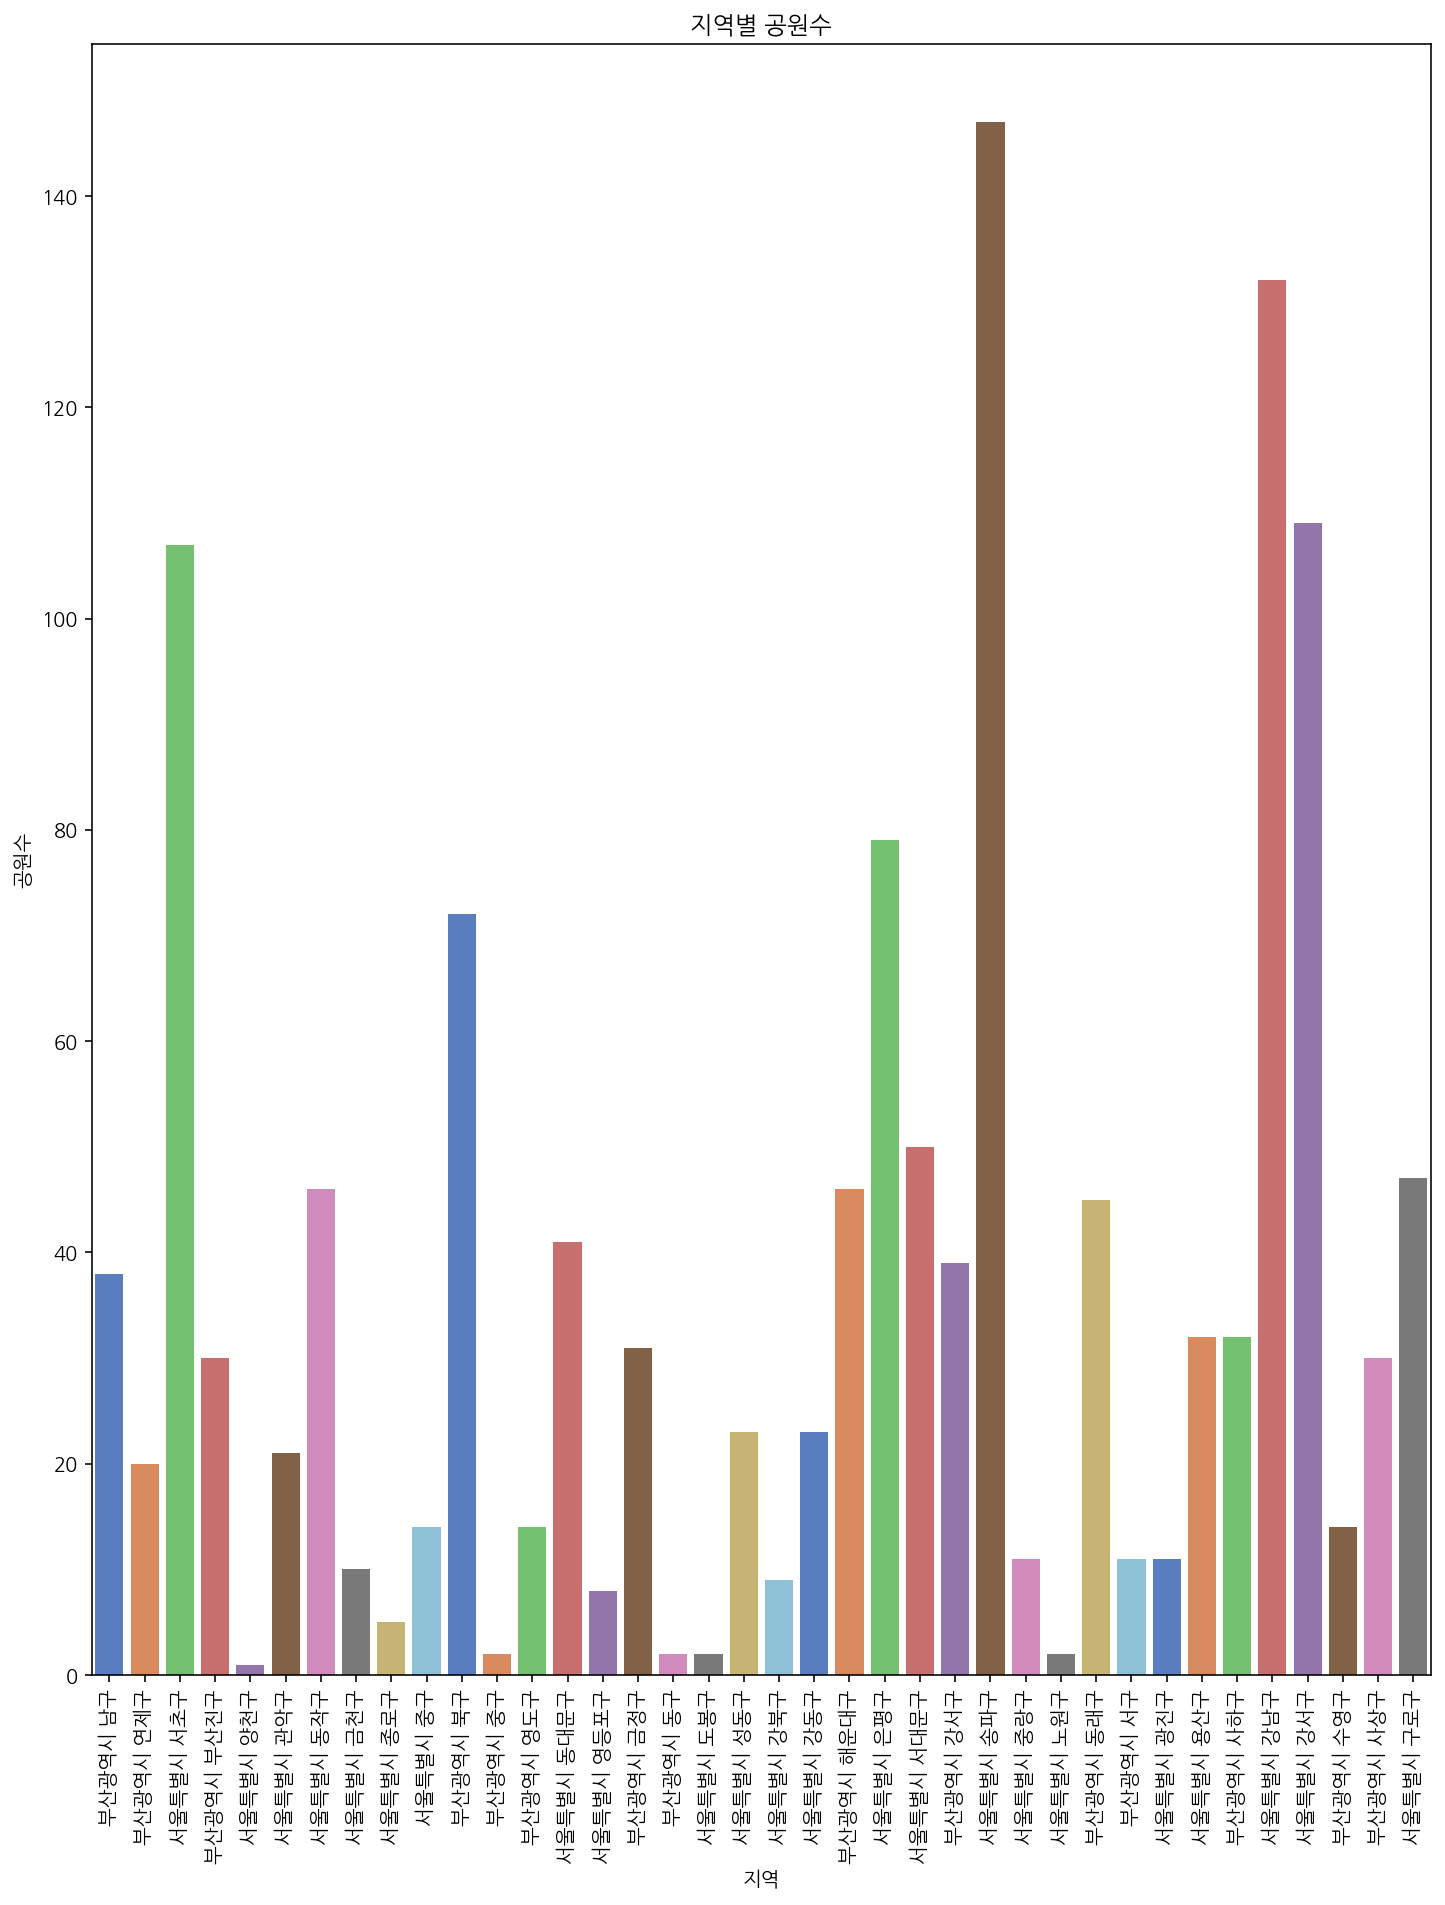

In [30]:
# city와 gu 컬럼을 합쳐서 새로운 지역 정보 컬럼 생성
park['region'] = park['city'] + ' ' + park['gu']

plt.figure(figsize=(12, 15))
sns.countplot(data=park, x='region',palette='muted')
plt.title('지역별 공원수')
plt.xlabel('지역')
plt.ylabel('공원수')
plt.xticks(rotation=90)
plt.show()


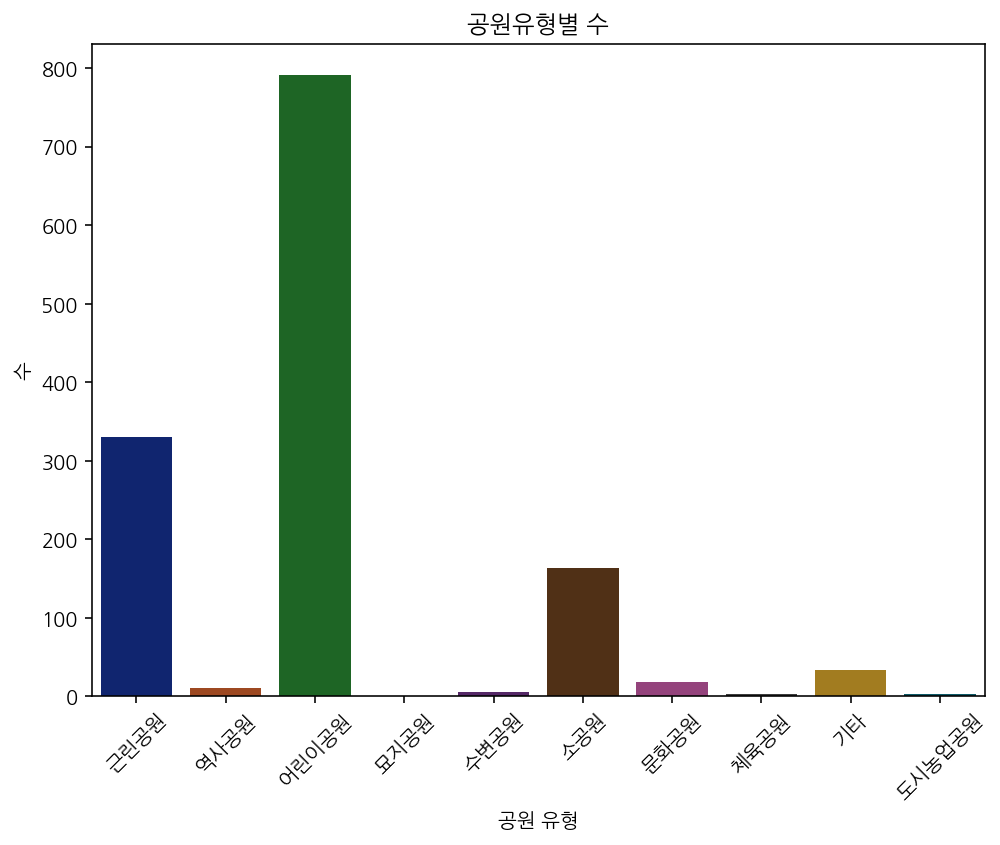

In [31]:
#공원 유형별 수
plt.figure(figsize=(8, 6))
sns.countplot(data=park, x='park_type', palette='dark')
plt.title('공원유형별 수')
plt.xlabel('공원 유형')
plt.ylabel('수')
plt.xticks(rotation=45)
plt.show()


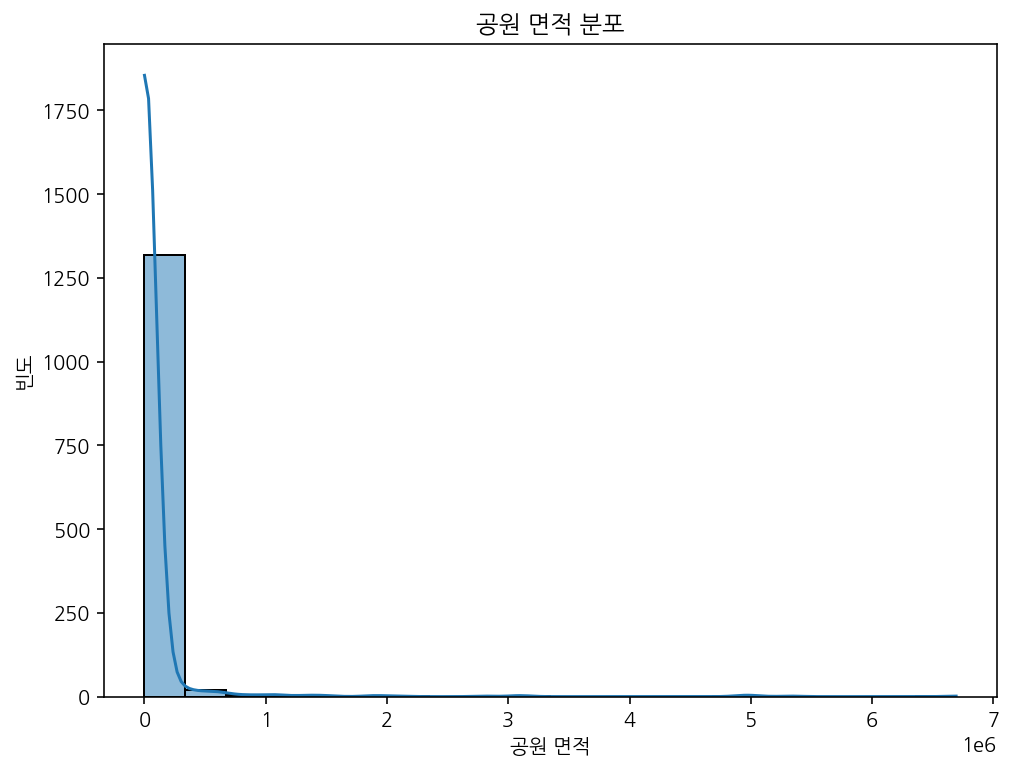

In [32]:
# 공원 면적 분포
plt.figure(figsize=(8, 6))
sns.histplot(data=park, x='park_area', bins=20, kde=True)
plt.title('공원 면적 분포')
plt.xlabel('공원 면적')
plt.ylabel('빈도')
plt.show()


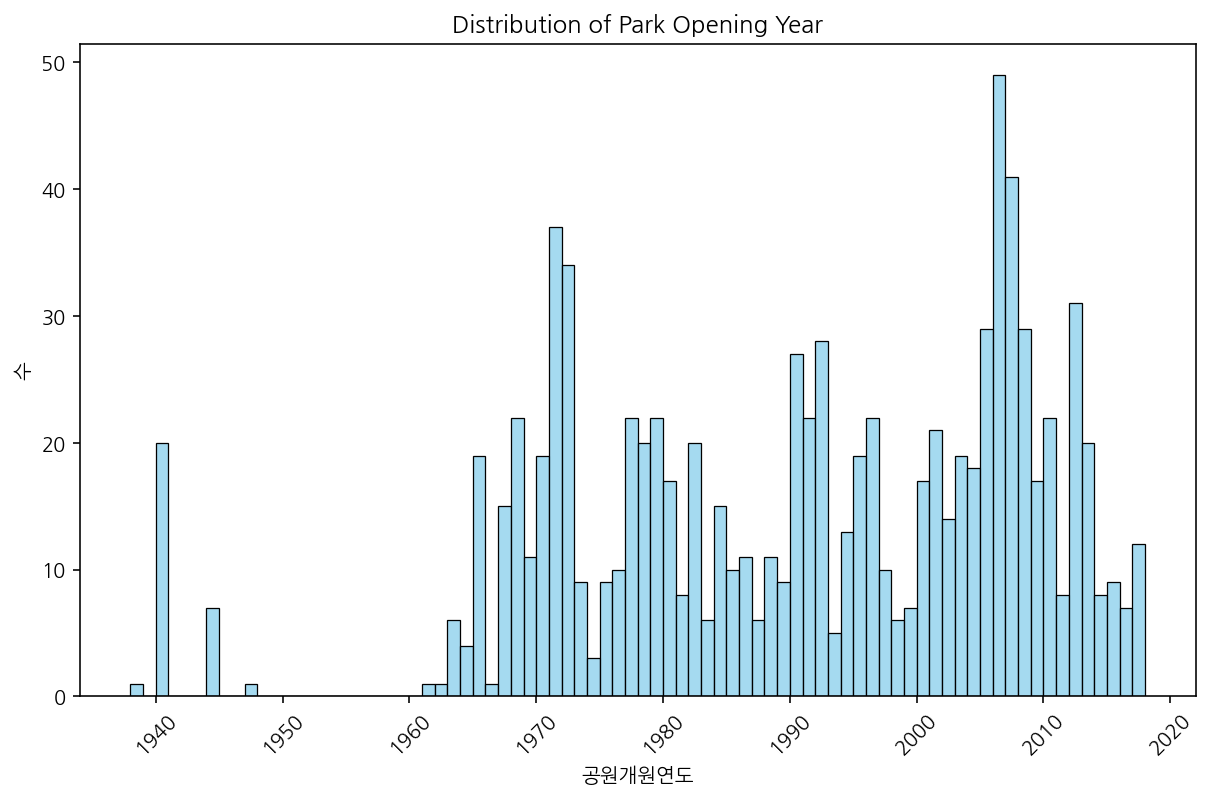

In [33]:
plt.figure(figsize=(10, 6))
sns.histplot(data=park, x='park_open_year', bins=range(int(park['park_open_year'].min()), int(park['park_open_year'].max()) + 1), kde=False, color='skyblue')
plt.title('Distribution of Park Opening Year')
plt.xlabel('공원개원연도')
plt.ylabel('수')
plt.xticks(rotation=45)
plt.show()


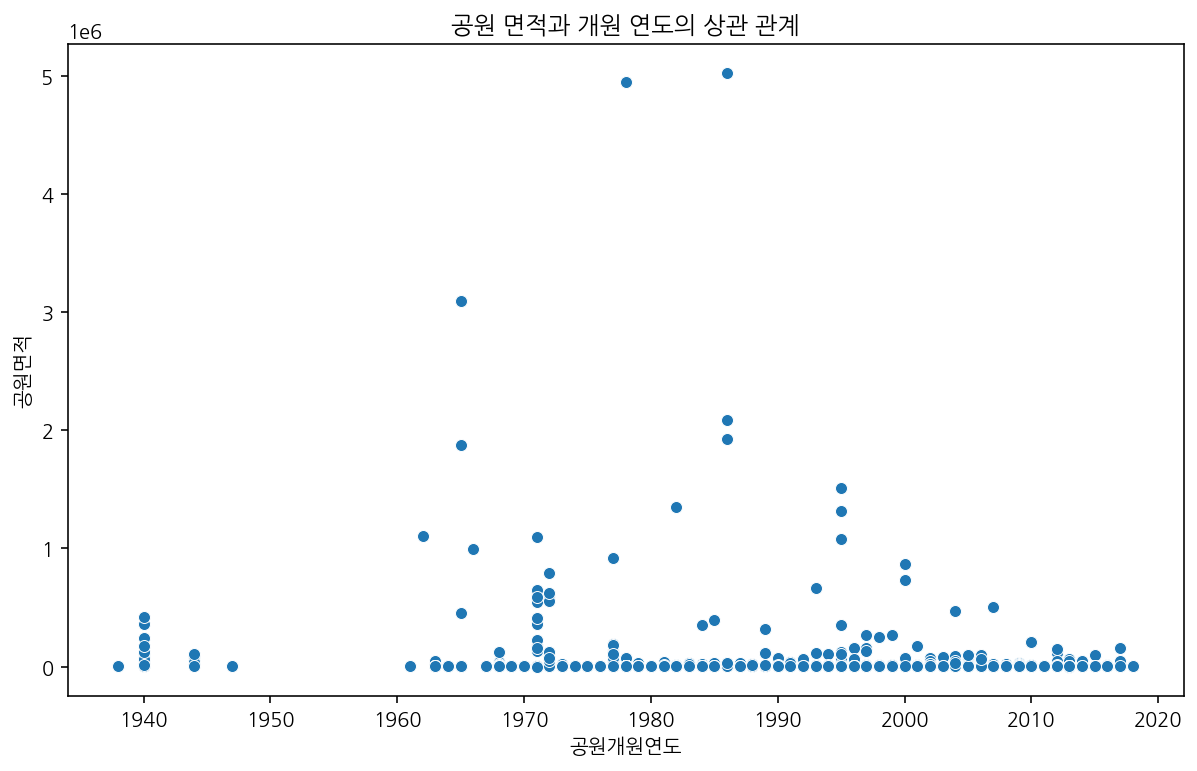

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=park, x='park_open_year', y='park_area')
plt.title('공원 면적과 개원 연도의 상관 관계')
plt.xlabel('공원개원연도')
plt.ylabel('공원면적')
plt.show()


### 1) train에 gu 정보 추가하기 
- park의 구, 동 정보 및 서울특별시, 부산광역시 공공데이터를 추가로 이용해서 train에 구 정보 추가
* 부산시 행정구역 : https://data.busan.go.kr/dataSet/detail.nm?publicdatapk=OA_CD00003&contentId=10 (https://kosis.kr/statHtml/statHtml.do?orgId=202&tblId=DT_206&lang_mode=ko&vw_cd=MT_OTITLE&list_id=202_20203_B&conn_path=I4)
* 서울시 행정구역 : https://data.seoul.go.kr/dataList/10043/S/2/datasetView.do

In [35]:
gu = pd.read_csv(home + '전국행정동리스트.csv')
gu.rename(columns={'전국행정동리스트':'city', 'Unnamed: 2':'gu', 'Unnamed: 3':'dong'}, inplace=True)
gu.drop([0,1], inplace=True)
gu = gu[['city','gu','dong']]
gu[(gu['city']=='서울특별시') | (gu['city']=='부산광역시')]

,city,gu,dong
2,서울특별시,종로구,청운동
3,서울특별시,종로구,신교동
4,서울특별시,종로구,궁정동
5,서울특별시,종로구,효자동
6,서울특별시,종로구,창성동
...,...,...,...
558,부산광역시,NaN,구칠리
559,부산광역시,NaN,이곡리
560,부산광역시,NaN,고촌리
561,부산광역시,NaN,안평리


In [36]:
# csv 저장
gu.to_csv(home + 'city_gu_dong.csv')

In [37]:
city_gu_dong = pd.read_csv(home + 'city_gu_dong.csv', index_col=0)
city_gu_dong

,city,gu,dong
2,서울특별시,종로구,청운동
3,서울특별시,종로구,신교동
4,서울특별시,종로구,궁정동
5,서울특별시,종로구,효자동
6,서울특별시,종로구,창성동
...,...,...,...
19829,제주특별자치도,NaN,하천리
19830,제주특별자치도,NaN,성읍리
19831,제주특별자치도,NaN,가시리
19832,제주특별자치도,NaN,세화리


### 어린이집 컬럼 변경

In [38]:
#선생님 1명당 케어해야할 아이의 수
daycare['baby_teacher'] = daycare['day_care_baby_num'] / daycare['teacher_num']

In [39]:
# 통학차량 여부 변경
daycare['commuting_vehicle'] = daycare['is_commuting_vehicle'].map({'Y': 1, 'N': 0, '': 0, 'y': 1, 'n': 0})

In [40]:
# 'city', 'gu', 'day_care_type' 별로 그룹화하고 각 그룹의 레코드 수를 계산
group = daycare.groupby(['city', 'gu', 'day_care_type']).size().reset_index(name='counts')

# 'day_care_type' 별로 컬럼을 만들고, NaN 값을 0으로 채우기
daycare_group = group.pivot_table(index=['city', 'gu'], columns='day_care_type', values='counts', fill_value=0).reset_index()

# 'day_care' total 컬럼 추가
daycare_group['total'] = daycare_group['가정'] + daycare_group['국공립'] + daycare_group['민간'] + daycare_group['법인·단체'] + daycare_group['사회복지법인'] + daycare_group['직장'] + daycare_group['협동'] 

# 컬럼 이름에 'daycare_' 추가
daycare_group.columns = ['daycare_' + col if col not in ['city', 'gu'] else col for col in daycare_group.columns]

# 컬럼 이름을 간결하게 만들기
daycare_group.columns.name = None
daycare_group = daycare_group.reset_index(drop=True)
daycare_group.head()

,city,gu,daycare_가정,daycare_국공립,daycare_민간,daycare_법인·단체,daycare_사회복지법인,daycare_직장,daycare_협동,daycare_total
0,부산광역시,강서구,71,6,35,0,5,5,1,123
1,부산광역시,금정구,30,6,58,1,7,3,1,106
2,부산광역시,기장군,98,13,56,0,5,3,3,178
3,부산광역시,남구,65,12,50,2,6,6,2,143
4,부산광역시,동구,8,9,11,2,2,7,0,39


In [41]:
# 'city'와 'gu' 기준으로 'baby_teacher'의 평균과 'commuting_vehicle'의 합을 계산합니다.
grouped = daycare.groupby(['city', 'gu']).agg({'baby_teacher': 'mean', 'commuting_vehicle': 'sum'}).reset_index()

# 계산된 결과를 'daycare_group'에 병합합니다.
daycare_group = pd.merge(daycare_group, grouped, on=['city', 'gu'], how='left')

# 열 이름을 변경합니다.
daycare_group.rename(columns={'baby_teacher': 'avg_baby_teacher', 'commuting_vehicle': 'sum_commuting_vehicle'}, inplace=True)

In [42]:
daycare_group.fillna(0, inplace=True)

In [43]:
daycare_group.sample(10)

,city,gu,daycare_가정,daycare_국공립,daycare_민간,daycare_법인·단체,daycare_사회복지법인,daycare_직장,daycare_협동,daycare_total,avg_baby_teacher,sum_commuting_vehicle
6,부산광역시,부산진구,60,20,65,5,5,8,2,165,0.000000,123.0
4,부산광역시,동구,8,9,11,2,2,7,0,39,5.577417,30.0
7,부산광역시,북구,90,9,78,1,7,1,2,188,0.000000,148.0
18,서울특별시,강북구,43,50,67,3,1,2,1,167,4.916191,0.0
10,부산광역시,서구,8,12,16,2,2,0,0,40,5.249649,31.0
2,부산광역시,기장군,98,13,56,0,5,3,3,178,0.000000,140.0
22,서울특별시,구로구,152,65,91,8,3,9,6,334,4.753445,63.0
13,부산광역시,영도구,10,12,17,7,1,2,0,49,5.729789,43.0
24,서울특별시,노원구,313,72,60,0,4,7,1,457,3.881365,84.0
29,서울특별시,성동구,65,76,33,3,0,7,0,184,0.000000,30.0


### 공원 컬럼 변경

In [44]:
# 'city', 'gu', 'dong', 'park_type' 별로 그룹화하고 각 그룹의 레코드 수를 계산
group = park.groupby(['city', 'gu', 'dong', 'park_type']).size().reset_index(name='counts')

# 'park_type' 별로 컬럼을 만들고, NaN 값을 0으로 채우기
park_group = group.pivot_table(index=['city', 'gu', 'dong'], columns='park_type', values='counts', fill_value=0).reset_index()

# 'park' total 컬럼 추가
park_group['total'] = park_group['근린공원'] + park_group['기타'] + park_group['도시농업공원'] + park_group['묘지공원'] + park_group['문화공원'] + park_group['소공원'] + park_group['수변공원'] + park_group['어린이공원'] + park_group['역사공원'] + park_group['체육공원']

# 컬럼 이름에 'park_' 추가
park_group.columns = ['park_' + col if col not in ['city', 'gu', 'dong'] else col for col in park_group.columns]

# 컬럼 이름을 간결하게 만들기
park_group.columns.name = None
park_group = park_group.reset_index(drop=True)
park_group.head()

,city,gu,dong,park_근린공원,park_기타,park_도시농업공원,park_묘지공원,park_문화공원,park_소공원,park_수변공원,park_어린이공원,park_역사공원,park_체육공원,park_total
0,부산광역시,강서구,녹산동,1,0,0,0,0,0,0,0,0,0,1
1,부산광역시,강서구,대저1동,0,0,0,0,0,1,0,0,0,0,1
2,부산광역시,강서구,명지동,6,0,0,0,1,2,0,16,0,0,25
3,부산광역시,강서구,송정동,2,0,0,0,0,0,0,0,0,0,2
4,부산광역시,강서구,신호동,2,0,0,0,0,0,0,2,0,0,4


In [45]:
# 'city', 'gu'와 'dong' 기준으로 'part_area'의 합을 계산합니다.
grouped = park.groupby(['city', 'gu', 'dong']).agg({'park_area': 'sum'}).reset_index()

# 계산된 결과를 'park_group'에 병합합니다.
park_group = pd.merge(park_group, grouped, on=['city', 'gu', 'dong'], how='left')

# 열 이름을 변경합니다.
# park_group.rename(columns={'park_area': 'sum_part_area'}, inplace=True)

In [46]:
park_group.sample(10)

,city,gu,dong,park_근린공원,park_기타,park_도시농업공원,park_묘지공원,park_문화공원,park_소공원,park_수변공원,park_어린이공원,park_역사공원,park_체육공원,park_total,park_area
26,부산광역시,동래구,사직동,0,0,0,0,0,4,0,4,0,0,8,18913.4
32,부산광역시,부산진구,개금동,1,0,0,0,0,0,0,3,0,0,4,38502.0
125,서울특별시,구로구,오류동,1,1,0,0,1,0,0,1,0,0,4,1518862.0
243,서울특별시,중랑구,신내동,7,0,0,0,0,0,0,0,0,0,7,131094.0
181,서울특별시,성동구,행당동,0,0,0,0,0,1,0,2,0,0,3,7568.9
236,서울특별시,중구,신당동,1,0,0,0,0,0,0,2,0,0,3,113335.0
192,서울특별시,송파구,오금동,5,0,0,0,0,0,1,8,0,0,14,283715.2
241,서울특별시,중랑구,면목동,0,1,0,0,0,1,0,0,0,0,2,2801845.8
34,부산광역시,부산진구,범전동,1,0,0,0,0,0,0,0,0,0,1,470758.0
0,부산광역시,강서구,녹산동,1,0,0,0,0,0,0,0,0,0,1,12211.9


### 병원 데이터

In [47]:
hospital = pd.read_csv(home +'hospital_data.csv')

In [48]:
hospital.rename(columns={'시': 'city', '동': 'dong', '병원 수': 'Hospital'}, inplace=True)

In [49]:
hospital

,city,dong,Hospital
0,부산광역시,가야동,1
1,부산광역시,감만동,1
2,부산광역시,감전동,2
3,부산광역시,감천동,3
4,부산광역시,개금동,7
...,...,...,...
239,서울특별시,화곡동,12
240,서울특별시,화양동,3
241,서울특별시,회기동,2
242,서울특별시,휘경2동,2


In [50]:
hospital.to_csv(home +'hospital.csv')

### 아파트데이터 컬럼 변경

In [51]:
#drop할 열 (4개)
train_df.drop(columns=['transaction_id','apartment_id','jibun','addr_kr'],axis=1,inplace=True)

In [52]:
#연, 월 분리 (transaction_year_month)
train_df['transaction_year'] = train_df['transaction_year_month'] //100
train_df['transaction_month'] = train_df['transaction_year_month'] % 100

In [53]:
#floor binning 처리하기
train_df['floor_category'] = pd.cut(
    train_df['floor'], 
    bins=[-float("inf"), 5, 10, 20, 40, float("inf")], 
    labels=[1, 2, 3, 4, 5])

In [54]:
train_df['floor_category'].value_counts()

1    420308
3    383358
2    339886
4     70373
5      2628
Name: floor_category, dtype: int64

In [55]:
train_df['floor_category'] = train_df['floor_category'].astype('int64')

In [56]:
#21~시작되는 애들은 다 동일한 것으로 묶어준다
train_df['transaction_date'] = train_df['transaction_date'].apply(lambda x: '21 이상' if x.startswith('21') else x)

In [57]:
train_df.head(3)

,city,dong,apt,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,transaction_year,transaction_month,floor_category
0,서울특별시,신교동,신현(101동),84.82,2002,200801,21 이상,2,37500,2008,1,1
1,서울특별시,필운동,사직파크맨션,99.17,1973,200801,1~10,6,20000,2008,1,2
2,서울특별시,필운동,두레엘리시안,84.74,2007,200801,1~10,6,38500,2008,1,2


In [58]:
from sklearn.preprocessing import LabelEncoder

# LabelEncoder 객체 생성
le = LabelEncoder()

train_df['transaction_date'] = le.fit_transform(train_df['transaction_date'])

train_df['transaction_date'].value_counts()

2    416453
0    408385
1    391715
Name: transaction_date, dtype: int64

In [59]:
train_df['transaction_date'].value_counts()

2    416453
0    408385
1    391715
Name: transaction_date, dtype: int64

### 데이터 병합

In [60]:
# train_df에 'city', 'dong'을 기준으로 'gu' 추가
train_df_merge = pd.merge(train_df, city_gu_dong[['city', 'dong', 'gu']], on=['city', 'dong'], how='left')

In [61]:
# 'city'와 'gu'를 기준으로 'train_df'와 'daycare_group'를 병합합니다.
# 'left' 방식을 사용하여 'train_df'의 모든 행을 유지하고, 'daycare_group'에서 일치하는 행을 병합합니다.
train_df_merge = pd.merge(train_df_merge, daycare_group, on=['city', 'gu'], how='left')

In [62]:
# 'city', 'gu', 'dong' 을 기준으로 'train_df'와 'park_group'를 병합합니다.
# 'left' 방식을 사용하여 'train_df'의 모든 행을 유지하고, 'park_group'에서 일치하는 행을 병합합니다.
train_df_merge = pd.merge(train_df_merge, park_group, on=['city', 'gu', 'dong'], how='left')

In [63]:
# 'city', 'dong' 을 기준으로 'train_df'와 'hospital'를 병합합니다.
# 'left' 방식을 사용하여 'train_df'의 모든 행을 유지하고, 'hospital'에서 일치하는 행을 병합합니다.
train_df_merge = pd.merge(train_df_merge, hospital, on=['city', 'dong'], how='left')

In [65]:
# 미리 전처리 해둔 지역구별 소득 분포 
grdp =pd.read_csv(home + 'grdp.csv')
grdp.head()

,city,gu,지역내총생산
0,서울특별시,종로구,31868698
1,서울특별시,중구,54274488
2,서울특별시,용산구,12300317
3,서울특별시,성동구,11657151
4,서울특별시,광진구,6342279


In [66]:
grdp.rename(columns={'지역내총생산': 'grdp'}, inplace=True)

In [67]:
# 'city'와 'gu'를 기준으로 'train_df'와 'grdp'를 병합합니다.
# 'left' 방식을 사용하여 'train_df'의 모든 행을 유지하고, 'grdp'에서 일치하는 행을 병합합니다.
train_df_merge = pd.merge(train_df_merge, grdp, on=['city', 'gu'], how='left')

In [71]:
# 스타벅스 데이터 추가
sb = pd.read_csv(home +'sb.csv')
sb.head()

,순번,city,gu,dong
0,1,서울특별시,강남구,역삼동
1,2,서울특별시,강남구,논현동
2,3,서울특별시,강남구,논현동
3,4,서울특별시,강남구,역삼동
4,5,서울특별시,강남구,대치동


In [72]:
# 'city', 'gu', 'dong' 기준으로 sb 데이터 레코드 수 계산
sb_group = sb.groupby(['city', 'gu', 'dong']).size().reset_index(name='sb_count')

In [73]:
sb_group.sort_values(by='sb_count', ascending=False)

,city,gu,dong,sb_count
506,서울특별시,강남구,역삼동,25
591,서울특별시,서초구,서초동,22
631,서울특별시,영등포구,여의도,19
493,부산광역시,해운대구,우동),15
502,서울특별시,강남구,삼성동,14
...,...,...,...,...
329,광주광역시,남구,월산동,1
330,광주광역시,남구,임암동,1
332,광주광역시,남구,진월동,1
333,광주광역시,동구,금남로,1


In [74]:
# 'city', 'gu', 'dong' 을 기준으로 'train_df'와 'sb_group'를 병합합니다.
# 'left' 방식을 사용하여 'train_df'의 모든 행을 유지하고, 'sb_group'에서 일치하는 행을 병합합니다.
train_df_merge = pd.merge(train_df_merge, sb_group, on=['city', 'gu', 'dong'], how='left')
train_df_merge.sample(5)

,city,dong,apt,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,transaction_year,...,park_소공원,park_수변공원,park_어린이공원,park_역사공원,park_체육공원,park_total,park_area,Hospital,grdp,sb_count
1099051,부산광역시,엄궁동,휴그린,63.736,2013,201607,0,4,14750,2016,...,1.0,0.0,6.0,0.0,0.0,7.0,14872.0,1.0,6760826.0,1.0
8869,서울특별시,신당동,남산타운,84.880,2002,201404,2,12,53000,2014,...,0.0,0.0,2.0,0.0,0.0,3.0,113335.0,2.0,54274488.0,1.0
355338,서울특별시,화곡동,중앙화곡하이츠,56.880,1988,200803,2,11,19800,2008,...,0.0,0.0,27.0,0.0,0.0,31.0,1410219.8,12.0,17607271.0,6.0
1147318,서울특별시,상계동,상계주공5(저층),31.980,1987,201703,2,4,28000,2017,...,0.0,0.0,0.0,0.0,0.0,1.0,6692795.0,9.0,6387713.0,5.0
101700,서울특별시,정릉동,정릉한일유앤아이,117.370,2006,200802,0,14,40000,2008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,6054811.0,NaN


In [75]:
# sb_counts 결측치 0으로 채우기
train_df_merge['sb_count'].fillna(0, inplace=True)

In [77]:
# 학교 데이터 추가
school = pd.read_csv(home + 'dong_school_count.csv')
school.head()

,city,dong,dong_school_count
0,부산광역시,가야동,7
1,부산광역시,감만동,4
2,부산광역시,감전동,2
3,부산광역시,감천동,8
4,부산광역시,강동동,1


In [78]:
school.rename(columns={'dong_school_count': 'school_count'}, inplace=True)

In [79]:
# 'city', 'dong' 을 기준으로 'train_df'와 'school'를 병합합니다.
# 'left' 방식을 사용하여 'train_df'의 모든 행을 유지하고, 'school'에서 일치하는 행을 병합합니다.
train_df_merge = pd.merge(train_df_merge, school, on=['city', 'dong'], how='left')
train_df_merge.sample(5)

,city,dong,apt,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,transaction_year,...,park_수변공원,park_어린이공원,park_역사공원,park_체육공원,park_total,park_area,Hospital,grdp,sb_count,school_count
627111,서울특별시,문정동,문정시영,39.69,1989,201503,0,3,24000,2015,...,0.0,9.0,0.0,0.0,20.0,232695.0,3.0,28617470.0,8.0,5.0
1236153,부산광역시,장림동,누리아띠,50.00,2013,201706,0,8,14400,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6900352.0,1.0,6.0
863939,부산광역시,만덕동,동원,59.84,1992,201507,1,1,13870,2015,...,0.0,12.0,0.0,0.0,17.0,407124.7,4.0,3125859.0,1.0,10.0
542881,서울특별시,서초동,우성1,147.84,1979,201503,0,12,122500,2015,...,0.0,12.0,0.0,0.0,15.0,570928.3,10.0,35277030.0,22.0,12.0
1154052,서울특별시,상계동,상계주공7(고층),45.90,1988,201709,0,10,33900,2017,...,0.0,0.0,0.0,0.0,1.0,6692795.0,9.0,6387713.0,5.0,32.0


In [80]:
# school_count 결측치 0으로 채우기
train_df_merge['school_count'].fillna(0, inplace=True)

In [81]:
# 지하철 데이터도 추가합니다.
subway = pd.read_csv(home +'dong_subway_count.csv')
subway.head()

,city,dong,dong_subway_count
0,서울특별시,가락동,5
1,서울특별시,가산동,1
2,서울특별시,갈월동,1
3,서울특별시,갈현동,2
4,서울특별시,강일동,1


In [82]:
subway.rename(columns={'dong_subway_count': 'subway_count'}, inplace=True)

In [83]:
# 'city', 'dong' 을 기준으로 'train_df'와 'subway'를 병합합니다.
# 'left' 방식을 사용하여 'train_df'의 모든 행을 유지하고, 'subway'에서 일치하는 행을 병합합니다.
train_df_merge = pd.merge(train_df_merge, subway, on=['city', 'dong'], how='left')
train_df_merge.sample(5)

,city,dong,apt,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,transaction_year,...,park_어린이공원,park_역사공원,park_체육공원,park_total,park_area,Hospital,grdp,sb_count,school_count,subway_count
1056564,부산광역시,망미동,명성그랜드빌,84.4600,2004,201010,0,3,14500,2010,...,4.0,0.0,0.0,5.0,12595.0,NaN,2575439.0,1.0,6.0,NaN
1161859,서울특별시,망원동,대림2,59.9900,2002,201705,1,4,48700,2017,...,NaN,NaN,NaN,NaN,NaN,NaN,19474677.0,1.0,2.0,1.0
152416,서울특별시,창동,삼성래미안,84.8700,1992,200911,1,5,42700,2009,...,0.0,0.0,0.0,2.0,675617.0,3.0,3352742.0,0.0,15.0,2.0
589457,서울특별시,도곡동,도곡렉슬,138.3156,2006,201602,2,17,174000,2016,...,2.0,0.0,0.0,9.0,290928.3,4.0,69186319.0,2.0,9.0,2.0
353576,서울특별시,목동,금호아파트(768),84.9200,1995,201610,2,6,40500,2016,...,NaN,NaN,NaN,NaN,NaN,2.0,6931171.0,0.0,18.0,2.0


In [84]:
# subway_count 결측치 0으로 채우기
train_df_merge['subway_count'].fillna(0, inplace=True)

In [85]:
# 모든 열 이름을 가져옵니다.
cols = list(train_df_merge.columns)

# 'transaction_real_price'를 제거합니다.
cols.remove('transaction_real_price')

# 'transaction_real_price'를 마지막에 추가합니다.
cols.append('transaction_real_price')

# 새로운 열 순서를 DataFrame에 적용합니다.
train_df_merge = train_df_merge[cols]

In [86]:
# test city one-hot-encoding
train_df_merge['city'] = le.fit_transform(train_df_merge['city'])
train_df_merge['city'].value_counts()

1    772929
0    474836
Name: city, dtype: int64

In [87]:
train_df_merge.head()

,city,dong,apt,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_year,transaction_month,...,park_역사공원,park_체육공원,park_total,park_area,Hospital,grdp,sb_count,school_count,subway_count,transaction_real_price
0,1,신교동,신현(101동),84.82,2002,200801,2,2,2008,1,...,NaN,NaN,NaN,NaN,NaN,31868698.0,0.0,0.0,0.0,37500
1,1,필운동,사직파크맨션,99.17,1973,200801,1,6,2008,1,...,NaN,NaN,NaN,NaN,NaN,31868698.0,0.0,1.0,0.0,20000
2,1,필운동,두레엘리시안,84.74,2007,200801,1,6,2008,1,...,NaN,NaN,NaN,NaN,NaN,31868698.0,0.0,1.0,0.0,38500
3,1,내수동,파크팰리스,146.39,2003,200801,0,15,2008,1,...,NaN,NaN,NaN,NaN,NaN,31868698.0,0.0,0.0,0.0,118000
4,1,내수동,킹스매너,194.43,2004,200801,2,3,2008,1,...,NaN,NaN,NaN,NaN,NaN,31868698.0,0.0,0.0,0.0,120000


In [88]:
train_df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1247765 entries, 0 to 1247764
Data columns (total 40 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   city                    1247765 non-null  int64  
 1   dong                    1247765 non-null  object 
 2   apt                     1247765 non-null  object 
 3   exclusive_use_area      1247765 non-null  float64
 4   year_of_completion      1247765 non-null  int64  
 5   transaction_year_month  1247765 non-null  int64  
 6   transaction_date        1247765 non-null  int64  
 7   floor                   1247765 non-null  int64  
 8   transaction_year        1247765 non-null  int64  
 9   transaction_month       1247765 non-null  int64  
 10  floor_category          1247765 non-null  int64  
 11  gu                      1184030 non-null  object 
 12  daycare_가정              1070366 non-null  float64
 13  daycare_국공립             1070366 non-null  float64
 14  da

In [89]:
train_df_merge.columns

Index(['city', 'dong', 'apt', 'exclusive_use_area', 'year_of_completion',
       'transaction_year_month', 'transaction_date', 'floor',
       'transaction_year', 'transaction_month', 'floor_category', 'gu',
       'daycare_가정', 'daycare_국공립', 'daycare_민간', 'daycare_법인·단체',
       'daycare_사회복지법인', 'daycare_직장', 'daycare_협동', 'daycare_total',
       'avg_baby_teacher', 'sum_commuting_vehicle', 'park_근린공원', 'park_기타',
       'park_도시농업공원', 'park_묘지공원', 'park_문화공원', 'park_소공원', 'park_수변공원',
       'park_어린이공원', 'park_역사공원', 'park_체육공원', 'park_total', 'park_area',
       'Hospital', 'grdp', 'sb_count', 'school_count', 'subway_count',
       'transaction_real_price'],
      dtype='object')

### 병합된 데이터 저장

In [90]:
# train_df_merge.to_csv(home + 'train_merged2.csv')
train_df_merge.to_csv(home + 'train_merged3.csv')

### 병합된 데이터 확인

In [91]:
train_df_merge.isnull().sum()

city                           0
dong                           0
apt                            0
exclusive_use_area             0
year_of_completion             0
transaction_year_month         0
transaction_date               0
floor                          0
transaction_year               0
transaction_month              0
floor_category                 0
gu                         63735
daycare_가정                177399
daycare_국공립               177399
daycare_민간                177399
daycare_법인·단체             177399
daycare_사회복지법인            177399
daycare_직장                177399
daycare_협동                177399
daycare_total             177399
avg_baby_teacher          177399
sum_commuting_vehicle     177399
park_근린공원                 295341
park_기타                   295341
park_도시농업공원               295341
park_묘지공원                 295341
park_문화공원                 295341
park_소공원                  295341
park_수변공원                 295341
park_어린이공원                295341
park_역사공원 

<AxesSubplot:>

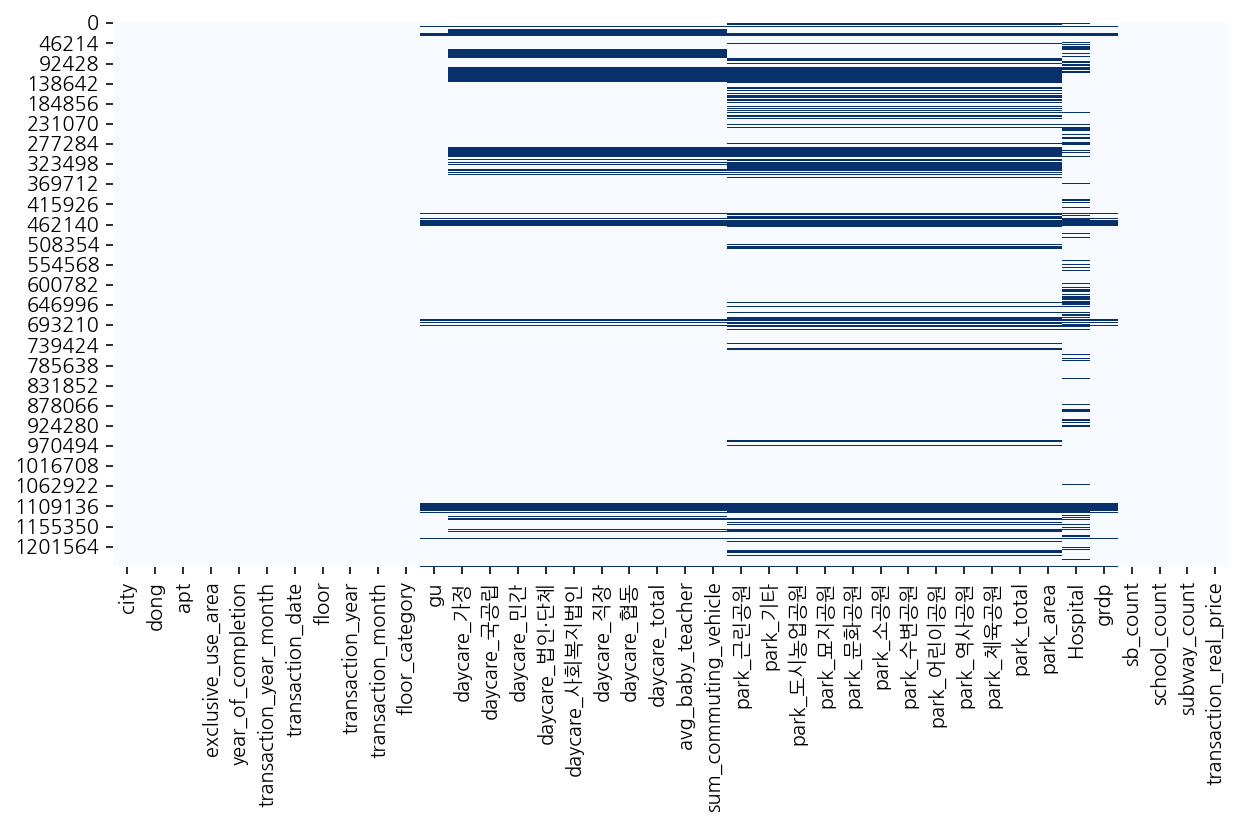

In [92]:
# 결측치 시각화
fig = plt.figure(figsize=(10, 5))
sns.heatmap(train_df_merge.isnull(), cbar=False, cmap='Blues')  

<AxesSubplot:>

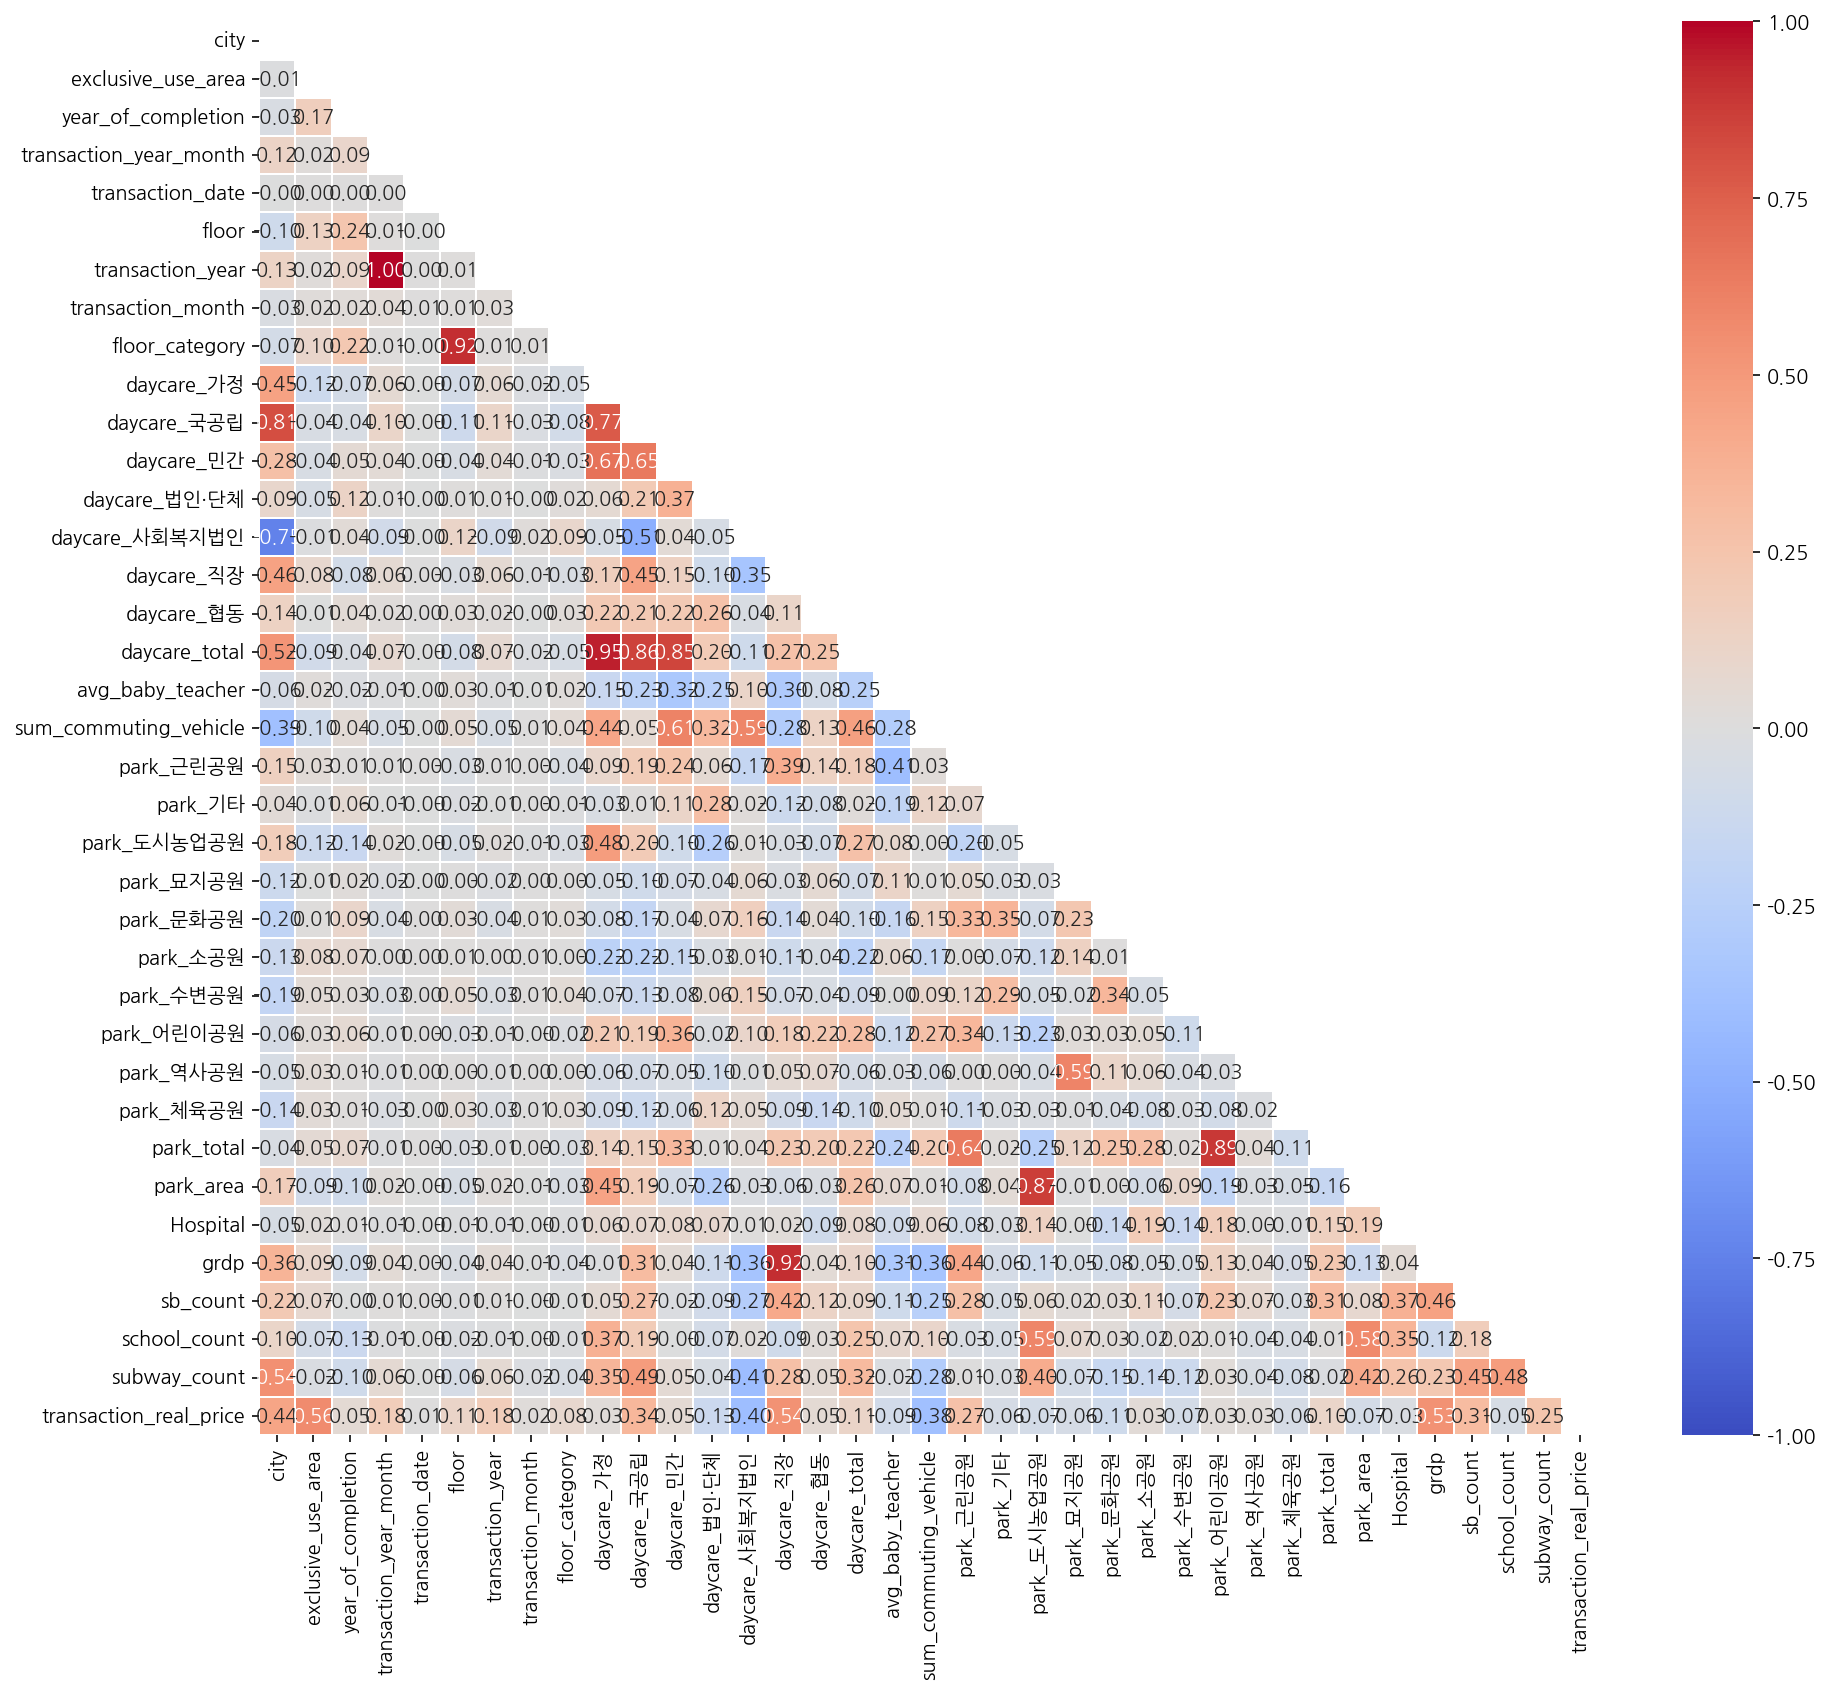

In [93]:
# corr = train_df_merge.corr(numeric_only=True)
# mask = np.triu(np.ones_like(corr, dtype=bool))
# fig = plt.figure(figsize=(15, 13))
# sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2, vmin = -1, vmax = 1, mask = mask)

# 파이썬 버전차이로 조금 LMS에서는 이 코드를 사용
numeric_train_df_merge = train_df_merge.select_dtypes(include=[np.number])

corr = train_df_merge.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig = plt.figure(figsize=(15, 13))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2, vmin = -1, vmax = 1, mask = mask)

In [94]:
# Drop non-numeric columns
numeric_train_df_merge = train_df_merge.select_dtypes(include=[np.number])

# Calculate correlation
corr = numeric_train_df_merge.corr()['transaction_real_price'].sort_values(ascending=False)

print(corr)

transaction_real_price    1.000000
exclusive_use_area        0.562646
daycare_직장                0.538569
grdp                      0.532981
city                      0.440626
daycare_국공립               0.341183
sb_count                  0.305323
park_근린공원                 0.265631
subway_count              0.249049
transaction_year_month    0.183491
transaction_year          0.183290
daycare_total             0.113162
floor                     0.110780
park_total                0.103864
floor_category            0.081630
year_of_completion        0.051073
daycare_민간                0.051001
daycare_협동                0.048939
park_소공원                  0.031559
park_역사공원                 0.030221
daycare_가정                0.029752
park_어린이공원                0.026926
transaction_month         0.023394
transaction_date          0.006533
Hospital                 -0.030819
school_count             -0.048111
park_체육공원                -0.056527
park_기타                  -0.058000
park_묘지공원           

<AxesSubplot:>

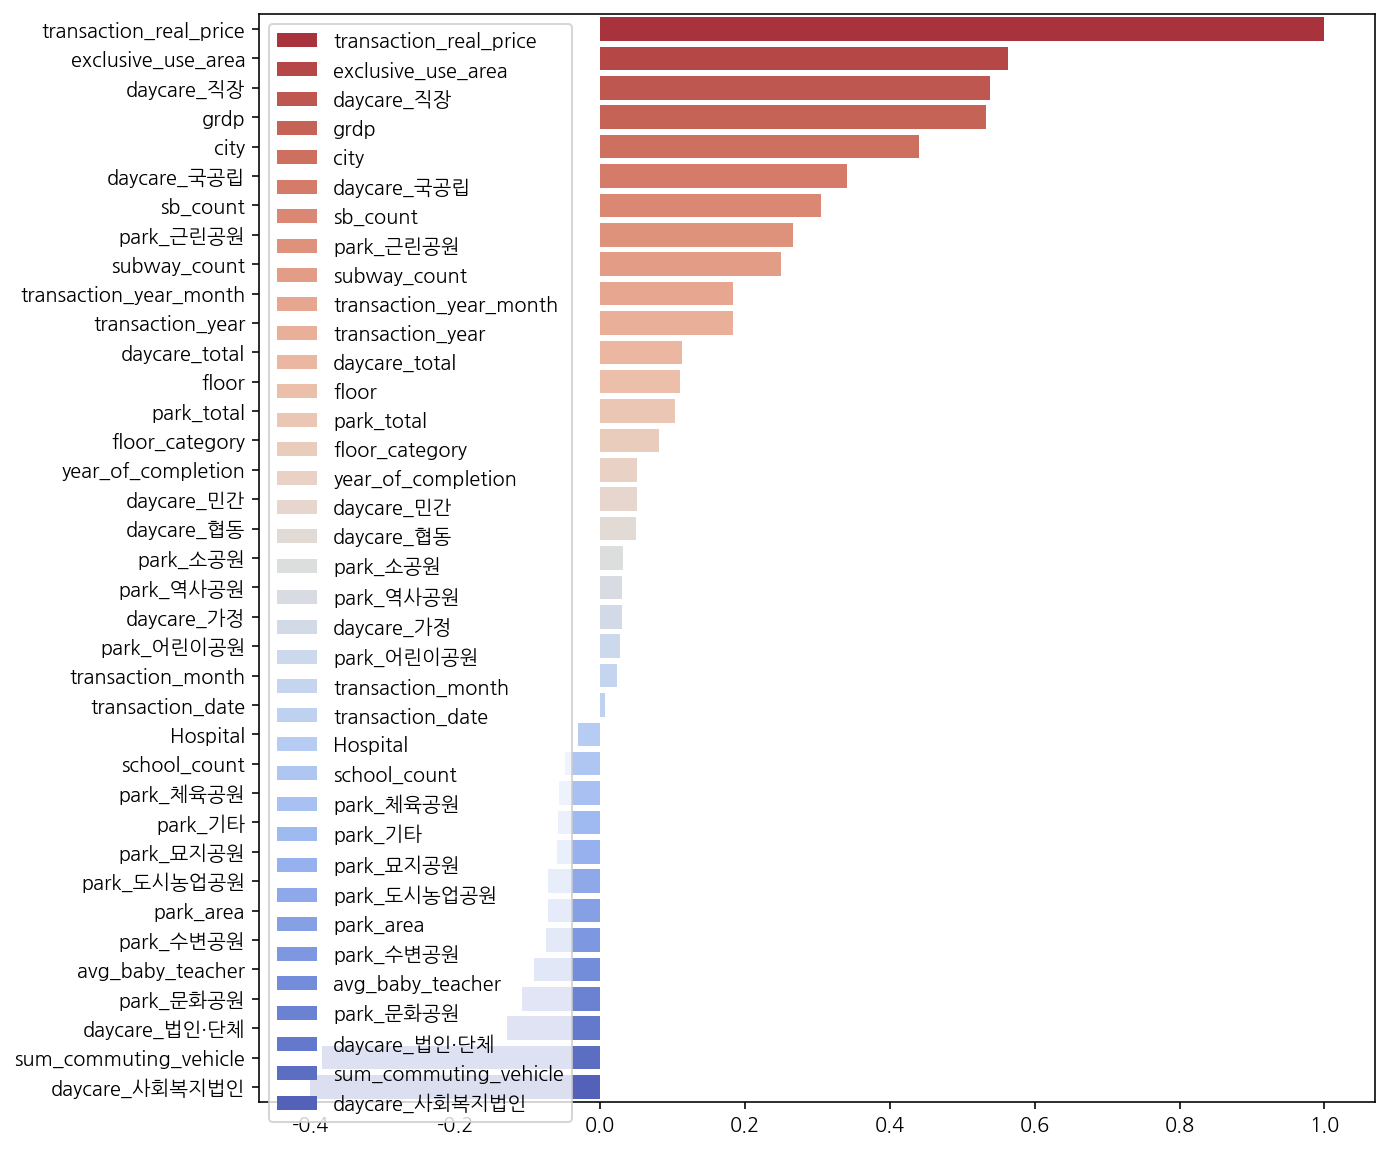

In [95]:
fig = plt.figure(figsize=(10, 10))
sns.barplot(x=corr.values, y=corr.index, hue=corr.index, dodge=False, palette='coolwarm_r')

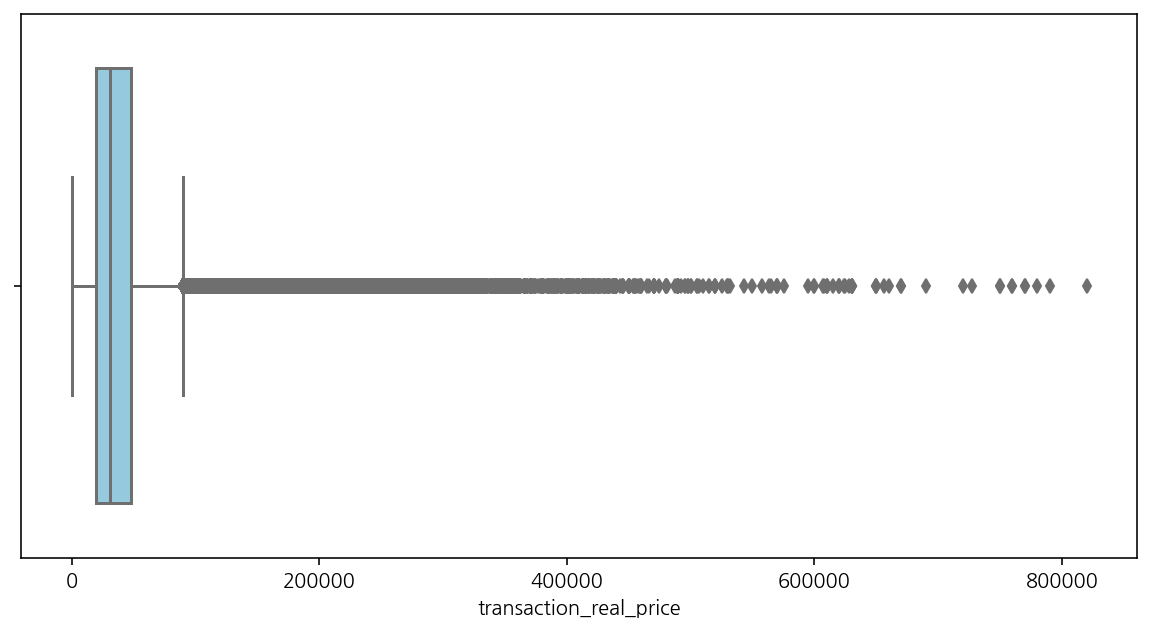

In [96]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(data=train_df_merge, x='transaction_real_price', color='skyblue');

이전에도 확인을 했지만 가격에 아웃라이거 너무 많다

### 병합 데이터 시각화

In [97]:
train_df_merge_vi = train_df_merge.copy()

#### 아파트
**연식**<br/>
신식 아파트일수록 거래가격이 비쌀까?

In [98]:
# 아파트가 지어진 후 년도차이
train_df_merge_vi['year_diff'] = train_df_merge_vi['transaction_year'] - train_df_merge_vi['year_of_completion']

In [ ]:
# 'year_diff'와 'price'의 관계를 그래프로 표현


plt.figure(figsize=(10, 6))
sns.regplot(x='year_diff', y='transaction_real_price', data=train_df_merge_vi, scatter_kws={'s': 50}, line_kws={"color": "red"})
plt.title('연도 차이와 추세선과 가격의 관계')
plt.xlabel('연도차이')
plt.ylabel('가격')
plt.show()

In [ ]:
#corr
train_df_merge_vi[['year_diff', 'transaction_real_price']].corr()

그래프의 분포를 보았을 때는 아파트 연식과 가격이 음의 상관관계가 있는 것으로 보여지나 추세선과 상관계수를 확인하였을 때 데이터의 표본이 많아지며 아파트 연식과 가격은 큰 상관관계가 없어 drop하겠습니다.

In [ ]:
# year_diff drop
train_df_merge_vi.drop('year_diff', axis=1, inplace=True)

**브랜드**<br/>
국토교통부 23년도 건설업체 시공능력평가 결과 기준 (https://www.molit.go.kr/USR/NEWS/m_71/dtl.jsp?lcmspage=2&id=95088649) <br/>
상위 20위 브랜드와 기타의 평균 가격으로 순위 측정

In [ ]:
#브랜드 건설사 순위를 매기기 위한 조건에 따른 함수 정의
def rank_apt(name):
    if '래미안' in name:
        return '삼성물산'
    elif '힐스테이트' in name:
        return '현대건설'
    elif '디에이치' in name:
        return '현대엔지니어링'
    elif '푸르지오' in name:
        return '대우'
    elif '자이' in name:
        return 'GS'
    elif 'e편한세상' in name.lower() or '아크로' in name:
        return 'DL'
    elif '더샵' in name or '오티에르' in name:
        return '포스코'
    elif 'e편한세상' in name.lower() or '아크로' in name:
        return 'DL'
    elif '롯데' in name or '르엘' in name:
        return '롯데'
    elif 'sk' in name.lower() or '드파인' in name or '아펠바움' in name:
        return 'SK'
    elif '베르디움' in name or '호반써밋' in name:
        return '호반'
    elif '아이파크' in name or '현대' in name:
        return 'HDC'
    elif '디에트르' in name or '대방' in name:
        return '대방'
    elif '포레나' in name or '꿈에그린' in name or '오벨리스크' in name:
        return '한화'
    elif '디에트르' in name or '대방' in name:
        return '대방'
    elif 'S-클래스' in name or 's-class' in name.lower():
        return '중흥'
    elif '데시앙' in name:
        return '태영'
    elif '풍경채' in name:
        return '제일'
    elif '엘리프' in name or 'elif' in name.lower() or 'richeville' in name.lower() or '리슈빌' in name:
        return '계룡'
    elif '하늘채' in name:
        return '코오롱'
    elif '스타힐스' in name or 'starhills' in name.lower():
        return '서희'
    else:
        return '기타'

# 'apt' 열의 값에 따라 순위를 매김
train_df_merge_vi['rank'] = train_df_merge_vi['apt'].apply(rank_apt)

In [ ]:
plt.figure(figsize=(14, 8))
sns.barplot(x='rank', y='transaction_real_price', data=train_df_merge_vi)
plt.title('아파트 등급별 평균 가격')
plt.xlabel('아파트 등급')
plt.ylabel('평균 가격')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.show()

자이 아파트가 압도적인 아파트 평균가격을 보여주고 있습니다.<br/>
그래프를 보았을 때 아파트 건설사 순위와 가격은 연관이 없는 것으로 확인됩니다.<br/>
모델 성능 향상을 위해 평균 가격 별로 등급을 측정하여 브랜드 이름에 매핑해 ['rank_avg_price']로 저장하겠습니다.


In [ ]:
# rank 별 평균 가격 계산
rank_avg_price = train_df_merge_vi.groupby('rank')['transaction_real_price'].mean()

# 평균 가격을 기준으로 순위 매기기
rank_avg_price_ranked = rank_avg_price.rank(method='dense').astype(int)

# 계산된 순위를 기반으로 각 아파트의 rank_avg_price 값을 매핑
train_df_merge_vi['rank_avg_price'] = train_df_merge_vi['rank'].map(rank_avg_price_ranked)

**평수**

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='exclusive_use_area', y='transaction_real_price', data=train_df_merge_vi, scatter_kws={'s': 100}, line_kws={"color": "red"})
plt.title('전용 사용 영역별 가격')
plt.xlabel('전용 사용 면적(㎡)')
plt.ylabel('거래 실제 가격')
plt.show()

평수는 가격을 결정하는데 주요한 요소인 것으로 보여집니다.

In [ ]:
plt.figure(figsize=(10, 6))
sns.regplot(x='floor', y='transaction_real_price', data=train_df_merge_vi, scatter_kws={'s': 100}, line_kws={"color": "red"})
plt.title('층별 가격')
plt.xlabel('층')
plt.ylabel('거래 실제 가격')
plt.show()

In [ ]:
#corr
train_df_merge_vi[['floor', 'transaction_real_price']].corr()

층수 별 최고가는 음의 상관관계로 높아질수록 가격이 낮아져보이지만 <br/>
평균적으로는 층수와 가격은 양의 상관관계이며 높을수록 가격이 비싸지는 경향이 있는 것으로 확인됩니다.

### 입지적 요소

**공원**

### 경제적 요소

**기준금리** <br/>
출처 : e-나라지표 (https://www.index.go.kr/unity/potal/main/EachDtlPageDetail.do?idx_cd=1073)

In [ ]:
#기준 금리
data = {
    'transaction_year' : [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017],
    'base_rate': [3.00, 2.00, 2.50, 3.25, 2.75, 2.50, 2.00, 1.50, 1.25, 1.50]
}

data = pd.DataFrame(data)

# 기준금리를 'Base Rate'에 저장
train_df_merge_vi = train_df_merge_vi.merge(data, on='transaction_year', how='left')


In [ ]:
#시각화
plt.figure(figsize=(10, 6))
sns.barplot(x='base_rate', y='transaction_real_price', data=train_df_merge_vi, estimator=np.mean, ci=None)
plt.title('Average Transaction Price by Base Rate')
plt.xlabel('Base Rate (%)')
plt.ylabel('Average Transaction Price')
plt.xticks(rotation=45)  # x축 라벨 회전
plt.show()

In [ ]:
#corr
train_df_merge_vi[['base_rate', 'transaction_real_price']].corr()

기준 금리는 음의 상관관계를 보이지만 예상보다는 적은 영향을 주는 것으로 확인됩니다.

**지역별 인구밀도** <br/>
단위 : 명/km<br/>
출처: 통계청「장래인구추계 시도편 : 2020-2050」, 국토교통부「지적통계」 (https://www.index.go.kr/unity/potal/main/EachDtlPageDetail.do?idx_cd=1007)

In [ ]:
data_hu = {
    'transaction_year' : [2008,	2009,	2010,	2011,	2012,	2013,	2014,	2015,	2016,	2017],
    '서울_인구' : [	16714,	16758,	16667,	16643,	16583,	16507,	16482,	16425,	16263,	16136],
    '부산_인구' : [	4588,	4566,	4531,	4524,	4498,	4489,	4485,	4484,	4477,	4447]
}

data_hu = pd.DataFrame(data_hu)

# 인구밀도를 'Base Rate'에 저장
train_df_merge_vi = train_df_merge_vi.merge(data_hu, on='transaction_year', how='left')


In [ ]:
# 'transaction_real_price'를 기준으로 정렬

plt.subplot(2, 1, 1) 
sns.barplot(x='서울_인구', y='transaction_real_price', data=train_df_merge_vi, estimator=np.mean, ci=None)
plt.title('Transaction Real Price by Seoul Population')
plt.xlabel('Seoul Population')
plt.ylabel('Transaction Real Price')
plt.legend()

plt.subplot(2, 1, 2) 
sns.barplot(x='부산_인구', y='transaction_real_price', data=train_df_merge_vi, estimator=np.mean, ci=None)
plt.title('Price by Seoul Population by Busan Population')
plt.xlabel('Busan Population')
plt.ylabel('Transaction Real Price')
plt.legend()


plt.tight_layout()

plt.show()

예상하지 못했던 결과가 나왔습니다. <br/>
인구밀도가 높을수록 집값이 비싸야하지만 인구밀도가 낮을수록 가격이 높은 것이 확인됩니다. <br/> <br/>
원인은 연도에서 찾을 수 있었는데, 인구 밀도가 높을수록 과거 연도이기 때문에 가격이 낮은 것으로 보여집니다. <br/>
과거 데이터임에도 주요도시의 인구 밀도가 조금씩 감소하는 것을 체감할 수 있었습니다..
<스크린샷>

### 결측치처리 및 base_model

In [ ]:
train_df_merge.isnull().sum()

In [ ]:
# train_df_merge.drop(['city', 'dong', 'apt', 'gu'], axis=1, inplace=True)
train_df_merge.drop(['dong', 'apt', 'gu'], axis=1, inplace=True)

In [ ]:
# 무한대 값을 NaN으로 대체합니다.
train_df_merge.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
# 각 열의 결측치를 해당 열의 중앙값으로 채웁니다.
train_df_merge.fillna(train_df_merge.median(), inplace=True)

In [ ]:
train_df_merge.isnull().sum()

### 결측치 제거후 데이터 저장

In [ ]:
train_df_merge.to_csv(home + 'train_merged3.csv')

In [ ]:
train_df_merge

In [ ]:
train_df_merge.info()

In [ ]:
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error

X = train_df_merge.drop('transaction_real_price', axis=1)
y = train_df_merge['transaction_real_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5);

In [ ]:
# 아웃라이어 제거
# 'transaction_real_price' 열에 대해 IQR을 계산합니다.
Q1 = train_df_merge['transaction_real_price'].quantile(0.25)
Q3 = train_df_merge['transaction_real_price'].quantile(0.75)
IQR = Q3 - Q1

# 1.5 x IQR 규칙에 따라 이상치를 제거합니다.
train_df_merge = train_df_merge[~((train_df_merge['transaction_real_price'] < (Q1 - 1.5 * IQR)) | (train_df_merge['transaction_real_price'] > (Q3 + 1.5 * IQR)))]

In [ ]:
fig = plt.figure(figsize=(10, 5))
sns.boxplot(data = train_df_merge, x='transaction_real_price', color='skyblue')

In [ ]:
# #아웃 라이어 제거 후 상관관계 확인
# corr = train_df_merge.corr(numeric_only=True)
# mask = np.triu(np.ones_like(corr, dtype=bool))
# fig = plt.figure(figsize=(25, 25))
# sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', linewidths=0.2, vmin = -1, vmax = 1, mask = mask)

In [ ]:

# # Drop non-numeric columns
# numeric_train_df = train_df_merge.select_dtypes(include=[np.number])

# # Calculate correlation
# corr = numeric_train_df.corr()['transaction_real_price'].sort_values(ascending=False)

# fig = plt.figure(figsize=(10, 10))
# sns.barplot(x=corr.values.flatten(), y=corr.index, hue=corr.index, dodge=False, palette='coolwarm_r')


In [ ]:
# 가격  IQR을 계산후 재학습
X = train_df_merge.drop('transaction_real_price', axis=1)
y = train_df_merge['transaction_real_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)
model = XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))


In [ ]:
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

## 모델 비교

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression     # 선형 회귀
from sklearn.linear_model import SGDRegressor         # 확률적 경사하강법
from sklearn.tree import DecisionTreeRegressor        # 의사결정나무
from sklearn.ensemble import RandomForestRegressor    # 앙상블 모델 - 랜덤포레스트
from sklearn.svm import SVR                           # 서포트 벡터 머신
from xgboost import XGBRegressor                      # XGBoost
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'Avenir'

X = train_df_merge.drop('transaction_real_price', axis=1)
y = train_df_merge['transaction_real_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

MAE = [] # mean_absolute_error(true, preds)
MSE = [] # mean_squared_error(true, preds)
RMSE = [] # np.sqrt(mean_squared_error(true, preds))
MLSE = [] # mean_squared_log_error(true, preds)
RMSLE = [] # np.sqrt(mean_squared_log_error(true, preds))
R2 = [] # r2_score(true, preds)

for model in [DecisionTreeRegressor(), 
              RandomForestRegressor(n_jobs=-1), 
              # SVR(kernel='linear'), 
              # SGDRegressor(), 
              LinearRegression(n_jobs=-1),
              XGBRegressor(n_jobs=-1)
              ]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model.__class__.__name__, r2_score(y_test, y_pred))
    MAE.append(mean_absolute_error(y_test, y_pred))
    MSE.append(mean_squared_error(y_test, y_pred))
    RMSE.append(np.sqrt(mean_squared_error(y_test, y_pred,)))
    # MLSE.append(mean_squared_log_error(y_test, y_pred))
    # RMSLE.append(np.sqrt(mean_squared_log_error(y_test, y_pred)))
    R2.append(r2_score(y_test, y_pred))

fig, ax = plt.subplots(2, 1, figsize=(15, 8))

sns.barplot(y=R2, x=['DecisionTree', 'RandomForest', 'Linear', 'XGB'], hue = R2, palette='crest', ax=ax[0]) 
for i, R2 in enumerate(R2):
    ax[0].text(i, R2, round(R2, 4), ha='center', va='bottom')
ax[0].legend().remove()
ax[0].set_ylim([0.6, 1])
ax[0].set_title('R2 of each model')

sns.lineplot(x=['DecisionTree', 'RandomForest', 'Linear', 'XGB'], y=MAE, label='MAE', ax=ax[1], marker='o')
sns.lineplot(x=['DecisionTree', 'RandomForest', 'Linear', 'XGB'], y=RMSE, label='RMSE', ax=ax[1], marker='^', markersize=10)
# sns.lineplot(x=['DecisionTree', 'RandomForest', 'SGD', 'Linear', 'XGB'], y=RMSLE, label='RMSLE', ax=ax[1], marker='s')
ax[1].set_title('MAE/RMSE of each model')

In [ ]:
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5);

## Standard Scaler 

In [ ]:
# StandardScaler를 사용하여 수치형 열을 표준화합니다.
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X = train_df_merge.drop('transaction_real_price', axis=1)
y = train_df_merge['transaction_real_price']

X_scaled = X.copy()
X_scaled[X.columns] = scaler.fit_transform(X)

In [ ]:
X_scaled.head()

In [ ]:
# 표준화된 데이터로 train_test_split을 사용하여 훈련 데이터와 테스트 데이터를 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=25)
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

## MinMxScaler 진행

In [ ]:
# StandardScaler를 사용하여 수치형 열을 표준화합니다.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = train_df_merge.drop('transaction_real_price', axis=1)
y = train_df_merge['transaction_real_price']

X_minmax = X.copy()
X_minmax[X.columns] = scaler.fit_transform(X)

In [ ]:
X_minmax.head()

In [ ]:
# 표준화된 데이터로 train_test_split을 사용하여 훈련 데이터와 테스트 데이터를 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.3, random_state=25)
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

In [ ]:
# shap 가 없다면 설치
!pip install shap

In [ ]:
import shap

# 모델을 설명할 Explainer를 생성합니다.
explainer = shap.Explainer(model)

# 테스트 데이터에 대한 SHAP 값을 계산합니다.
shap_values = explainer(X_test)

# 요약 플롯을 생성합니다.
shap.summary_plot(shap_values.values, X_test)

In [ ]:
# 워터폴 플롯을 생성합니다.
# X_test의 첫 번째 샘플에 대한 SHAP 값을 사용합니다.
shap.plots.waterfall(shap_values[0])

In [ ]:
shap.plots.waterfall(shap_values[1])

In [ ]:
shap.plots.initjs()
shap.plots.bar(shap_values)

In [ ]:
# Force plot
shap.plots.force(shap_values[200])

In [ ]:
# Beeswarm plot
shap.plots.beeswarm(shap_values)

In [ ]:
shap.plots.scatter(shap_values[:, "daycare_국공립"])  

In [ ]:
shap.plots.scatter(shap_values[:, "exclusive_use_area"])

In [ ]:
shap.plots.scatter(shap_values[:, "transaction_year_month"])  

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import koreanize_matplotlib

home = os.getenv('HOME') + '/Downloads/aiffel/datathon/data/'

In [ ]:
train_df_merge = pd.read_csv(home +'train_merged2.csv', index_col=0)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix


X = train_df_merge.drop('transaction_real_price', axis=1)
y = train_df_merge['transaction_real_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)

Acc = []
Prec = []
Recall = []
F1 = []

# model = DecisionTreeClassifier(random_state=25)
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# print(model.__class__.__name__, accuracy_score(y_test, y_pred))
# Acc.append(accuracy_score(y_test, y_pred))
# Prec.append(precision_score(y_test, y_pred, average='weighted'))
# Recall.append(recall_score(y_test, y_pred, average='weighted'))
# F1.append(f1_score(y_test, y_pred, average='weighted'))


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

In [ ]:
X_train

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Min-Max 스케일링 객체 생성
scaler = MinMaxScaler()

# 스케일링할 피처 선택
columns_to_scale = X_train.columns

# Min-Max 스케일링을 위해 학습 데이터에 fit 및 transform 수행
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=columns_to_scale)

# 테스트 데이터에도 동일한 스케일링을 적용 (주의: 테스트 데이터는 학습 데이터에 대해 fit한 결과를 사용하여 transform)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=columns_to_scale)


In [ ]:
X_train_scaled

In [ ]:
# RandomForestClassifier 
model = RandomForestClassifier(random_state=25, n_jobs=8) #cpu core수를 확인해서 사용 예)m1_max core수 10개, 모두다 써버리면 오류 발생
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
print(model.__class__.__name__, accuracy_score(y_test, y_pred))
Acc.append(accuracy_score(y_test, y_pred))
Prec.append(precision_score(y_test, y_pred, average='weighted'))
Recall.append(recall_score(y_test, y_pred, average='weighted'))
F1.append(f1_score(y_test, y_pred, average='weighted'))

In [ ]:
# SVM 
model = svm.SVC(random_state=25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.__class__.__name__, accuracy_score(y_test, y_pred))
Acc.append(accuracy_score(y_test, y_pred))
Prec.append(precision_score(y_test, y_pred, average='weighted'))
Recall.append(recall_score(y_test, y_pred, average='weighted'))
F1.append(f1_score(y_test, y_pred, average='weighted'))

In [ ]:
# SGDClassifier
model = SGDClassifier(random_state=25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.__class__.__name__, accuracy_score(y_test, y_pred))
Acc.append(accuracy_score(y_test, y_pred))
Prec.append(precision_score(y_test, y_pred, average='weighted'))
Recall.append(recall_score(y_test, y_pred, average='weighted'))
F1.append(f1_score(y_test, y_pred, average='weighted'))

In [ ]:
# LogisticRegression
model = LogisticRegression(max_iter=10000,random_state=25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.__class__.__name__, accuracy_score(y_test, y_pred))
Acc.append(accuracy_score(y_test, y_pred))
Prec.append(precision_score(y_test, y_pred, average='weighted'))
Recall.append(recall_score(y_test, y_pred, average='weighted'))
F1.append(f1_score(y_test, y_pred, average='weighted'))

In [ ]:
# XGBClassifier
model = XGBClassifier(random_state=25)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.__class__.__name__, accuracy_score(y_test, y_pred))
Acc.append(accuracy_score(y_test, y_pred))
Prec.append(precision_score(y_test, y_pred, average='weighted'))
Recall.append(recall_score(y_test, y_pred, average='weighted'))
F1.append(f1_score(y_test, y_pred, average='weighted'))

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(15, 8))

sns.barplot(y=Acc, x=['DecisionTree', 'RandomForest', 'SVM', 'SGD', 'Logistic', 'XGBClassifier'], hue = Acc, palette='crest', ax=ax[0])
for i, acc in enumerate(Acc):
    ax[0].text(i, acc, round(acc, 4), ha='center', va='bottom')
ax[0].legend().remove()
ax[0].set_ylim([0.6, 1])
ax[0].set_title('Accuracy of each model for Iris Dataset')

sns.lineplot(x=['DecisionTree', 'RandomForest', 'SVM', 'SGD', 'Logistic', 'XGBClassifier'], y=Prec, label='Precision', ax=ax[1], marker='o')
sns.lineplot(x=['DecisionTree', 'RandomForest', 'SVM', 'SGD', 'Logistic', 'XGBClassifier'], y=Recall, label='Recall', ax=ax[1], marker='^')
sns.lineplot(x=['DecisionTree', 'RandomForest', 'SVM', 'SGD', 'Logistic', 'XGBClassifier'], y=F1, label='F1', ax=ax[1], marker='s', markersize=10)
for i, f1 in enumerate(F1):
    ax[1].text(i, f1, round(f1, 4), ha='center', va='bottom')
ax[1].set_title('Precision/Recall/F1 of each model for apt Dataset')

In [ ]:
for model in [DecisionTreeClassifier(),
              RandomForestClassifier(),
              svm.SVC(),
              SGDClassifier(),
              LogisticRegression(max_iter=10000),
              XGBClassifier()
              ]:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(model.__class__.__name__, accuracy_score(y_test, y_pred))
    Acc.append(accuracy_score(y_test, y_pred))
    Prec.append(precision_score(y_test, y_pred, average='weighted'))
    Recall.append(recall_score(y_test, y_pred, average='weighted'))
    F1.append(f1_score(y_test, y_pred, average='weighted'))


In [ ]:
y

In [ ]:
adsf

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import koreanize_matplotlib
from sklearn.model_selection import train_test_split

home = os.getenv('HOME') + '/Downloads/aiffel/datathon/data/' 

train_df_merge = pd.read_csv(home + 'train_merged2.csv')

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.rcParams['font.family'] = 'Avenir'

X = train_df_merge.drop('transaction_real_price', axis=1)
y = train_df_merge['transaction_real_price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=25)



In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

home = os.getenv('HOME') + '/aiffel/datathon_apt/data/' # 로컬에서 사용할 때 사용 하고 각자의 경로에 맞게 설정
# home = '/content/drive/MyDrive/data/'

train_df_merge = pd.read_csv(home + 'train_merged2.csv')

In [ ]:
# StandardScaler를 사용하여 수치형 열을 표준화합니다.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X = train_df_merge.drop('transaction_real_price', axis=1)
y = train_df_merge['transaction_real_price']

X_minmax = X.copy()
X_minmax[X.columns] = scaler.fit_transform(X)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error, mean_absolute_percentage_error
# 표준화된 데이터로 train_test_split을 사용하여 훈련 데이터와 테스트 데이터를 나눕니다.
X_train, X_test, y_train, y_test = train_test_split(X_minmax, y, test_size=0.3, random_state=25)
model = RandomForestRegressor(n_jobs=-1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))
fig = plt.figure(figsize=(10, 10))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)

In [ ]:
# 새로운 데이터 (예시)
new_data = [[exclusive_use_area_value, year_of_completion_value, transaction_year_month_value, transaction_date_value, floor_value, transaction_year_value, transaction_month_value, floor_category_value, daycare_가정_value, daycare_국공립_value, ..., subway_count_value]]

# 새로운 데이터를 표준화 (전처리)
new_data_scaled = scaler.transform(new_data)  # 여기서 scaler는 이전에 사용한 MinMaxScaler 객체여야 합니다.

# 모델을 사용하여 예측
predicted_value = model.predict(new_data_scaled)

print("예측값:", predicted_value)
